# Projet 2 : Analysez des données de systèmes éducatifs

* Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
* Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
* Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
* Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

## Importation des données
Nous importons les données sous forme de dataframe et affichons leur format.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set()

### Local

In [0]:
#répertoir avec nos fichiers
"""
os.chdir("/Users/Daily/Desktop/OPc/P2_smadja_paul/Input")

f_cnt = r'EdStatsCountry.csv'
f_cnts = r'EdStatsCountry-Series.csv'
f_data = r'EdStatsData.csv'
f_fn = r'EdStatsFootNote.csv'
f_s = r'EdStatsSeries.csv'

df_cnt = pd.read_csv(f_cnt)
df_cnts = pd.read_csv(f_cnts)
df_data = pd.read_csv(f_data)
df_fn = pd.read_csv(f_fn)
df_s = pd.read_csv(f_s)

print("Le jeu de données contient {} lignes et {} colonnes.".format(df_data.shape[0],df_data.shape[1]))
"""

'\nos.chdir("/Users/Daily/Desktop/OPc/P2_smadja_paul/Input")\n\nf_cnt = r\'EdStatsCountry.csv\'\nf_cnts = r\'EdStatsCountry-Series.csv\'\nf_data = r\'EdStatsData.csv\'\nf_fn = r\'EdStatsFootNote.csv\'\nf_s = r\'EdStatsSeries.csv\'\n\ndf_cnt = pd.read_csv(f_cnt)\ndf_cnts = pd.read_csv(f_cnts)\ndf_data = pd.read_csv(f_data)\ndf_fn = pd.read_csv(f_fn)\ndf_s = pd.read_csv(f_s)\n\nprint("Le jeu de données contient {} lignes et {} colonnes.".format(df_data.shape[0],df_data.shape[1]))\n'

### Colab


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#répertoir avec nos fichiers
images_dir = "/content/drive/My Drive/data/OPC02"


f_data = images_dir +'/EdStatsData.csv'
f_fn = images_dir +'/EdStatsFootNote.csv'
f_s = images_dir +'/EdStatsSeries.csv'

df_cnt = pd.read_csv(images_dir + "/EdStatsCountry.csv")
df_cnts = pd.read_csv(images_dir +"/EdStatsCountry-Series.csv")
df_data = pd.read_csv(f_data)
df_fn = pd.read_csv(f_fn)
df_s = pd.read_csv(f_s)

print("Le jeu de données contient {} lignes et {} colonnes.".format(df_data.shape[0],df_data.shape[1]))

Le jeu de données contient 886930 lignes et 70 colonnes.


## Description des données
Nous commençons par afficher les premières et dernières lignes du dataframe.

In [0]:
df_data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous observons, à partir de ces quelques lignes :
* Le nom du pays (ou de la région) est indiqué dans la première colonne (index 0)
* le code du pays dans la deuxième colonne (index 1)
* le nom de l'indicateur est indiqué dans la troisième colonne (index 2)
* le code de l'indicateur est indiqué dans la quatrième colonne (index 3)
* les colonnes suivantes donnent les valeurs de l'indicateur depuis 1970 (index 4) à 2100.
    * valeurs passées : 1970 à 2017
    * projections futures : 2020 à 2100

Les données sont donc multi-indexé sur le pays ("Country code") et l'indicateur ("Indicator code").

De nombreuses valeurs ne sont pas renseignées (NaN). 

## Première exploration des pays et régions (ou zones) et Indicateurs

In [0]:
liste_pays = list(df_data["Country Name"].unique())
print("Nombre de pays et de régions dans le jeu de données :", len(liste_pays))
liste_pays[:25]

Nombre de pays et de régions dans le jeu de données : 242


['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World']

Nous constatons qu'il y a un total de 242 pays et régions.

Les régions sont situées au début de la base de données (par ordre alphabétique, de 'Arab World' à 'World').

Ensuite viennent les pays, également classés par ordre alphabétique (de 'Afghanistan' à 'Zimbabwe').

Nous séparons la liste des pays et celle des régions.

In [0]:
liste_regions = []
while 'World' in liste_pays:
    liste_regions.append(liste_pays.pop(0))
print("Liste des {} régions : de {} à {}".format(len(liste_regions), liste_regions[0], liste_regions[-1]))
print("Liste des {} pays : de {} à {}".format(len(liste_pays), liste_pays[0], liste_pays[-1]))

Liste des 25 régions : de Arab World à World
Liste des 217 pays : de Afghanistan à Zimbabwe


In [0]:
print("Nombre d'indicateurs dans le jeu de données :", len(df_data["Indicator Name"].unique()))

Nombre d'indicateurs dans le jeu de données : 3665


Il y a un très grand nombre d'indicateurs.

Il ne sera bien évidemment pas possible de tous les exploiter. Nous devrons sélectionner les plus pertinents pour notre analyse.

In [0]:
liste_codes_indicateurs = sorted(list(df_data["Indicator Code"].unique()))
pd.set_option("display.max_colwidth", 1000)
df_data[["Indicator Name", "Indicator Code"]].head(10)

,Indicator Name,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR
5,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE
6,"Adjusted net enrolment rate, primary, gender parity index (GPI)",UIS.NERA.1.GPI
7,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA
8,"Adjusted net enrolment rate, upper secondary, both sexes (%)",UIS.NERA.3
9,"Adjusted net enrolment rate, upper secondary, female (%)",UIS.NERA.3.F


Il semble que certains indicateurs soient décliné en plusieurs "versions", par exemple :
* pour chaque sexe, 
* pour les femmes, 
* pour les hommes,
* avec un index de "parité de genre" (gender parity)
* etc.

Ces différents indicateurs ont généralement un "Indicator Code" commençant par les mêmes valeurs.

Nous constatons aussi que certains indicateurs sont spécifiques à certaines régions/zones géographiques particulières. Ainsi, certains indicateurs sont intitulés "Africa Dataset".

## Identification des doublons & Données manquantes

In [0]:
# Les valeurs dupliquées correspondent aux lignes qui ont le même pays et le même indicateur.
duplicates = df_data.duplicated(subset=["Country Code","Indicator Code"], keep='first')

if True in list(duplicates.unique()):
    print("Il existe des données dupliquées.")
else:
    print("Il n'y a aucune donnée dupliquée.")

Il n'y a aucune donnée dupliquée.


Nous constatons qu'il n'y a pas de données dupliquées (même code pays et même code indicateur).

De plus, nous faisons le calcul : (nombre de pays/régions) * (nombre d'indicateurs) = 242 * 3665 = 886'930. Cela correspond bien au nombre de lignes trouvées dans la base de données. Il n'y a donc pas de ligne manquante : il existe une ligne pour chaque couple (pays/région , indicateur).

## Suppression des lignes (entièrement) vides
Nous avons vu que de nombreuses lignes sont entièrement vides.

Pour alléger les données, nous allons supprimer ces lignes qui ne contiennent aucune information.

In [0]:
list_columns = list(df_data.loc[:,"1970":"2100"])
data_cleaned = df_data.dropna(how="all", subset=list_columns)
print("Le nombre de lignes a été réduit à : {} lignes".format(data_cleaned.shape[0]))

Le nombre de lignes a été réduit à : 357405 lignes


# Étude du remplissage des indicateurs

In [0]:
data = df_data
#Résumé statistique
data.loc[:,"2010":"2020"].describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2020
count,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04
mean,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02
std,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04
min,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00
25%,1.322703e+00,1.216330e+01,1.100000e+01,1.306113e+01,1.614639e+01,4.100000e-01,1.826761e+01,2.000000,6.000000e-02
50%,2.046020e+01,9.853510e+01,9.759012e+01,1.000000e+02,1.000000e+02,5.235000e+01,6.264000e+03,2.000000,2.300000e-01
75%,3.121000e+03,1.065065e+05,1.038168e+05,1.426480e+05,1.636440e+05,6.153575e+04,5.939590e+05,3.000000,6.660000e+00
max,9.134676e+13,9.506314e+13,9.999473e+13,1.054580e+14,1.108060e+14,1.156198e+14,1.206030e+14,4.000000,1.599479e+06


Nous voyons que de très nombreuses valeurs sont manquantes pour chaque année.

En effet, il y a un total de 886'930 (8,86e+5) lignes mais l'effectif des valeurs non-nulles (sur la ligne "count") est très inférieur à cela, quelque soit l'année. En particulier, nous constatons que seulement 143 valeurs sont renseignées pour l'année 2017.

Nous allons étudier plus précisémment le taux de remplissage des indicateurse.

In [0]:
# Nous agrégeons les données par indicateur
gb_indicateurs = data.groupby('Indicator Code')

# Nous faison le compte des valeurs non-nulles pour chaque indicateur et chaque année
gb_indicateurs_count = gb_indicateurs.count()

# Nous calculons le taux de remplissage de chaque indicateur
# En divisant le nombre de données complétées par le nombre maximal de données
gb_indicateurs_count['Count data (past)'] = gb_indicateurs_count.loc[:,"1970":"2017"].sum(axis=1)/(48*242)
gb_indicateurs_count['Count data (futur)'] = gb_indicateurs_count.loc[:,"2020":"2030"].sum(axis=1)/(3*242)
gb_indicateurs_count['Count data (total)'] = (48*gb_indicateurs_count['Count data (past)'] + 3*gb_indicateurs_count['Count data (futur)'])/51

# Nous calculons aussi, pour chaque indicateur, le nombre total d'années de données
gb_indicateurs_count['Count years'] = gb_indicateurs_count.loc[:,"1970":"2030"].astype(bool).sum(axis=1)

# Tri des indicateurs par nombre décroissant de réponses
data_gb_indicators = gb_indicateurs_count.sort_values("Count data (past)",ascending=False)

# Affiche une valeur sur 200
data_gb_indicators[::500]

,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Count data (past),Count data (futur),Count data (total),Count years
Indicator Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SP.POP.TOTL,242,242,242,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,238,238,237,237,237,238,238,238,240,240,240,240,240,240,240,240,240,240,240,240,240,240,239,239,232,232,232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.960313,0.0,0.903824,47
UIS.GTVP.2.GPV.F,242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,126,178,178,184,186,176,188,190,177,187,190,191,176,184,182,172,155,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.261880,0.0,0.246475,19
BAR.TER.SCHL.2024,242,242,242,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.111570,0.0,0.105007,9
LO.PISA.REA.4.MA,242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,40,0,0,55,0,0,70,0,0,64,0,0,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.029356,0.0,0.027629,6
HH.DHS.OOST.L.Q1,242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,5,6,5,5,11,6,14,6,12,5,3,11,7,16,9,9,9,5,11,7,14,8,8,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.017734,0.0,0.016691,26
LO.LLECE.MAT3,242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003702,0.0,0.003484,3
LO.PASEC.REA.6.P75,242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000861,0.0,0.000810,1
LO.EGRA.READ.0.KNY.6GRD,242,242,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000086,0.0,0.000081,1


Nous constatons que certains indicateurs ne sont quasiment pas remplis, par aucun pays et aucune année. Comme il y a un total de 48 colonnes pour les années passées (1970 à 2017), et 242 pays ou régions, un indicateur totalement rempli pour le passé devrait comporter 11'616 valeurs.

Pour le taux global (passé + futur), nous avons fait une moyenne pondérée.

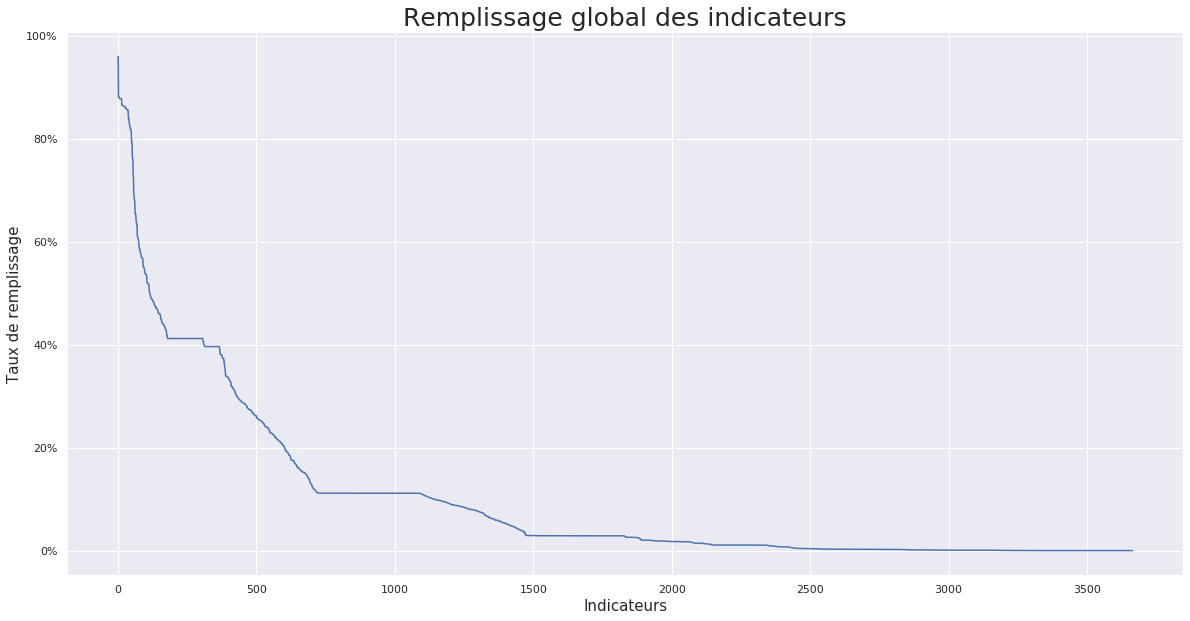

In [0]:
# Nous allons construire un diagramme en bâtons présentant le nombre de valeurs par indicateur
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

indicateurs = range(len(data_gb_indicators))
completed_rate = data_gb_indicators.sort_values("Count data (past)",ascending=False)["Count data (past)"]

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Remplissage global des indicateurs", fontsize=25)
plt.xlabel("Indicateurs", fontsize=15)
plt.ylabel("Taux de remplissage", fontsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plot = ax.plot(indicateurs, completed_rate)

## Étude du nombre d'années de données par indicateur

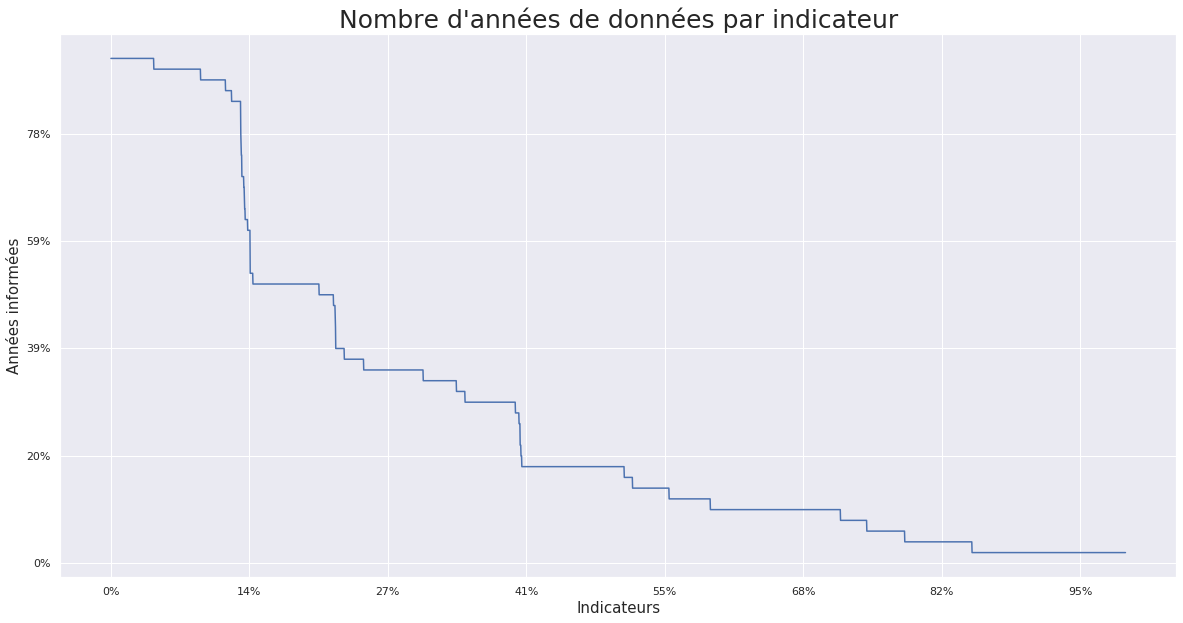

In [0]:
# Nous allons construire un diagramme en bâtons présentant le nombre d'années remplies par indicateur
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

indicateurs = range(len(liste_codes_indicateurs))
completed_rate = data_gb_indicators.sort_values("Count years",ascending=False)["Count years"]

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Nombre d'années de données par indicateur", fontsize=25)
plt.xlabel("Indicateurs", fontsize=15)
plt.ylabel("Années informées", fontsize=15)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(liste_codes_indicateurs)))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=51))
plot = ax.plot(indicateurs, completed_rate)

Nous allons à étudier plus en détail le taux de remplissage de chaque indicateur par pays et par régions.

In [0]:
# On compte, pour chaque ligne (ou couple pays/indicateur) si il y a des données complétées et  au dataframe
# On ajoute une colonne 0 si il n'existe pas de donnée, et 1 sinon
def non_nul(value):
    if value==0:
        return 0
    else:
        return 1

data['Indicator_filled_by_country'] = data.loc[:,"1970":"2030"].count(axis=1).apply(non_nul)


# Nous faisons un tableau croisé dynamique des indicateurs et des pays par rapport au décompte
data_pt = data.pivot_table('Indicator_filled_by_country', index=['Indicator Code'], columns=[
                           'Country Name'], aggfunc="sum")

# Nous sommons sur la ligne pour avoir le nombre de pays qui ont renseignés l'indicateur
data_pt['Count countries'] = data_pt.loc[:,"Afghanistan":"Zimbabwe"].sum(axis=1)

# Nous trions et affichons une ligne sur 200
data_pt.sort_values('Count countries',ascending=False)[::500]

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,...,St. Martin (French part),St. Vincent and the Grenadines,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe,Count countries
Indicator Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SP.POP.GROW,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,240
SP.POP.AG17.MA.UN,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,192
PRJ.MYS.60UP.MF,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,0,1,1,...,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,1,1,167
BAR.NOED.2529.FE.ZS,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,...,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,0,0,1,1,0,0,0,1,1,1,144
UIS.NAR.1.Q1.M,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,75
HH.MICS.OOS.1.Q1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,33
LO.PASEC.REA.2.P90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
LO.EGRA.LSTN.0.DAGB.2GRD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


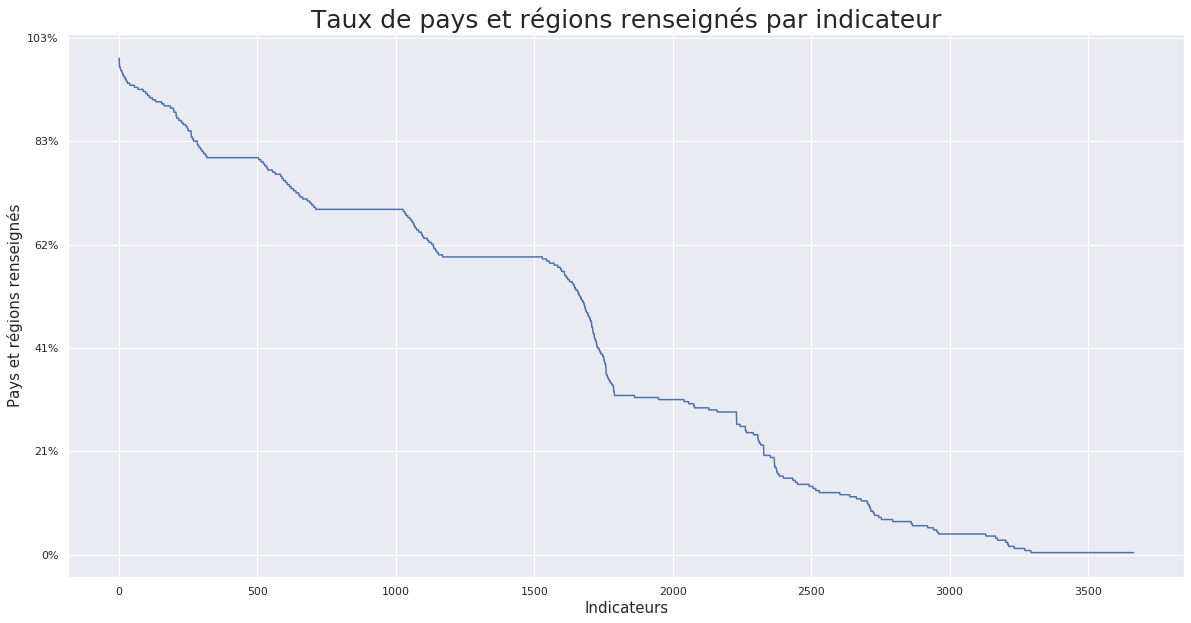

In [0]:
# Nous allons construire un diagramme présentant le nombre de valeurs par indicateur
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

indicateurs = range(len(data_pt))
completed_countries = data_pt.sort_values('Count countries',ascending=False)['Count countries']

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Taux de pays et régions renseignés par indicateur", fontsize=25)
plt.xlabel("Indicateurs", fontsize=15)
plt.ylabel("Pays et régions renseignés", fontsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=242))
plot = ax.plot(indicateurs, completed_countries)

## Taux de remplissage global de la table

In [0]:
nb_countries = len(df_data["Country Code"].unique())
nb_years = len(list(df_data.loc[:,"1970":"2030"]))
nb_indicators = len(df_data["Indicator Code"].unique())

max_data = nb_countries * nb_years * nb_indicators

nb_data = data_pt["Count countries"].sum()

filling_rate = nb_data / max_data

print("Le taux de remplissage global de la table de données est {:.2%}".format(filling_rate))

Le taux de remplissage global de la table de données est 0.79%


## Étude du remplissage par région, en termes de données

In [0]:
# Nous tronquons le dataframe sur les régions à l'aide d'un masque
masque_regions = (data["Country Name"].isin(liste_regions))
data_regions = data[masque_regions]

# Nous agglomérons le dataframe par région
gb_regions = data_regions.groupby('Country Name')

# Nous faisons le compte des données complétées par pays, et on classe par ordre décroissant
gb_regions_count = gb_regions.count()
gb_regions_count['Total'] = gb_regions_count.loc[:,"1970":"2030"].sum(axis=1)
gb_regions_count = gb_regions_count.sort_values("Total",ascending=False)
gb_regions_count[::8]

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Indicator_filled_by_country,Total
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
World,3665,3665,3665,175,175,178,180,184,184,184,184,184,184,187,190,187,187,189,201,209,210,208,209,220,225,225,251,255,257,257,285,332,332,334,337,337,337,337,341,341,340,340,340,646,338,350,353,340,457,34,0,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,0,3665,13254
Lower middle income,3665,3665,3665,182,185,185,185,182,182,184,184,187,188,190,190,187,188,188,206,215,215,215,215,227,229,229,258,259,259,259,271,299,324,335,335,335,335,339,339,339,338,338,338,338,338,351,356,344,149,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3665,11748
Sub-Saharan Africa,3665,3665,3665,130,135,151,157,157,173,177,179,179,179,180,183,182,190,191,193,195,192,192,194,202,209,212,209,212,228,229,281,331,336,336,338,340,345,345,343,347,362,362,373,373,371,381,381,331,34,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3665,11354
Europe & Central Asia (excluding high income),3665,3665,3665,77,79,79,79,81,82,87,87,88,88,98,98,100,120,120,144,144,145,146,154,161,169,208,214,216,216,219,244,300,319,322,322,324,324,326,327,329,330,334,336,335,331,340,352,334,42,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3665,9403


Il y a un total de 51 colonnes pour les années passées (1970 à 2030), et 3665 indicateurs. Une région dont tous les indicateurs sont remplis devrait donc compter 186'915 valeurs.

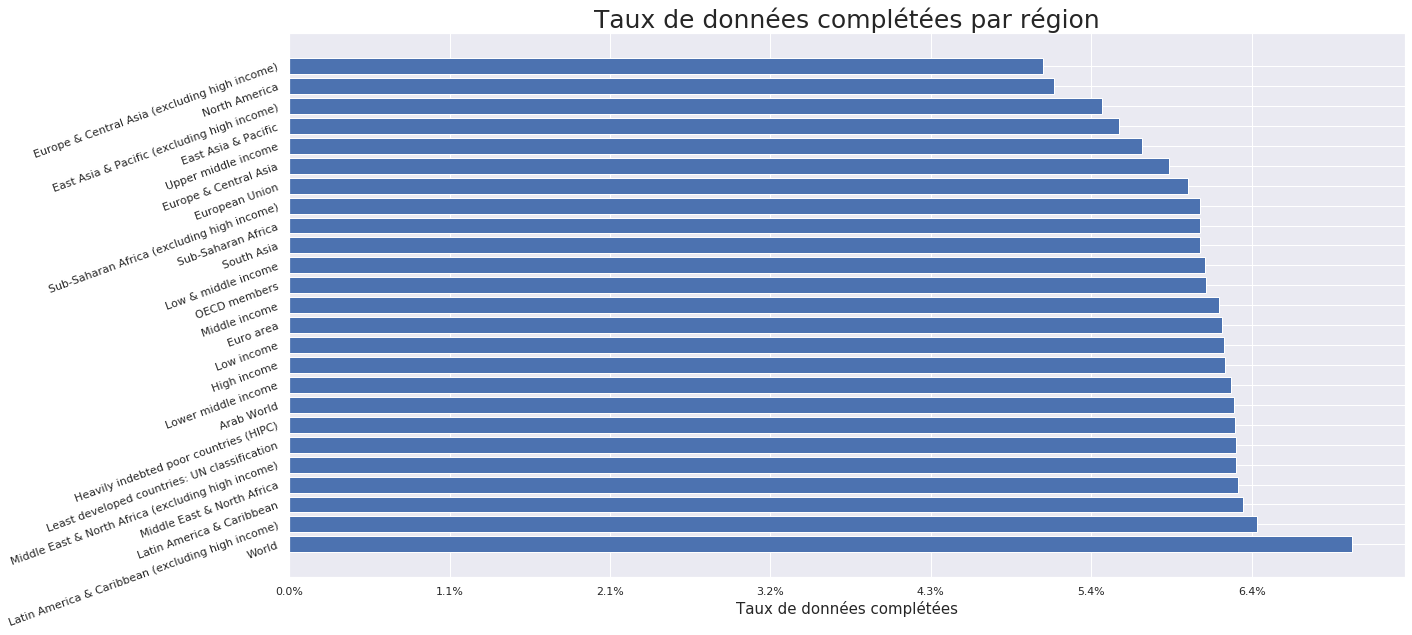

In [0]:
# Nous allons construire un diagramme en bâtons présentant le nombre de valeurs par région
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

regions = list(gb_regions_count.index)
completed_rate = gb_regions_count["Total"]

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Taux de données complétées par région", fontsize=25)
plt.yticks(rotation=20)
plt.xlabel("Taux de données complétées", fontsize=15)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=186915))

plot = ax.barh(regions, completed_rate)

Nous constatons que les taux de remplissages sont plutôt homogènes, mais faibles (de l'ordre de 6%).

## Étude du remplissage par pays, en terme de données

In [0]:
# Nous tronquons le dataframe sur les régions à l'aide d'un masque
data_countries = data[~masque_regions]

# Nous agglomérons le dataframe par pays
gb_country = data_countries.groupby('Country Name')

# On fait le compte des données complétées par pays, et on classe par ordre décroissant
gb_country_count = gb_country.count()
gb_country_count['Total'] = gb_country_count.loc[:,"1970":"2030"].sum(axis=1)
gb_country_count = gb_country_count.sort_values("Total",ascending=False)
gb_country_count[::50] # affiche une valeur sur 10

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Indicator_filled_by_country,Total
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Malta,3665,3665,3665,424,314,340,345,343,694,356,329,326,328,686,352,347,341,370,738,335,332,349,332,897,539,531,523,536,931,524,533,635,673,1190,782,869,710,814,1164,743,930,856,775,1528,1008,922,890,760,854,88,0,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,0,3665,30110
"Iran, Islamic Rep.",3665,3665,3665,415,271,173,174,174,534,200,174,128,64,424,71,109,112,189,579,227,290,320,292,863,521,445,494,461,849,323,428,290,542,996,690,715,783,668,1067,800,793,749,812,1451,924,847,900,820,770,63,0,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,0,3665,24908
Dominican Republic,3665,3665,3665,435,204,114,107,79,458,76,74,71,72,434,143,79,83,82,449,93,61,56,56,606,261,261,274,333,644,371,321,408,734,932,291,763,419,657,1017,574,1064,668,718,1456,832,943,1161,826,850,72,0,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,0,3665,21606
Djibouti,3665,3665,3665,53,127,156,264,269,279,280,57,57,85,75,87,116,116,116,171,230,222,224,205,351,353,429,426,407,376,457,460,286,691,594,610,586,303,611,695,782,694,698,645,323,697,611,501,596,624,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3665,17131
Nauru,3665,3665,3665,8,29,39,39,31,13,14,16,14,16,13,13,13,13,13,64,8,8,8,8,8,14,8,8,8,8,8,8,102,49,124,216,197,124,121,124,137,235,109,48,48,44,274,44,314,39,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3665,2838


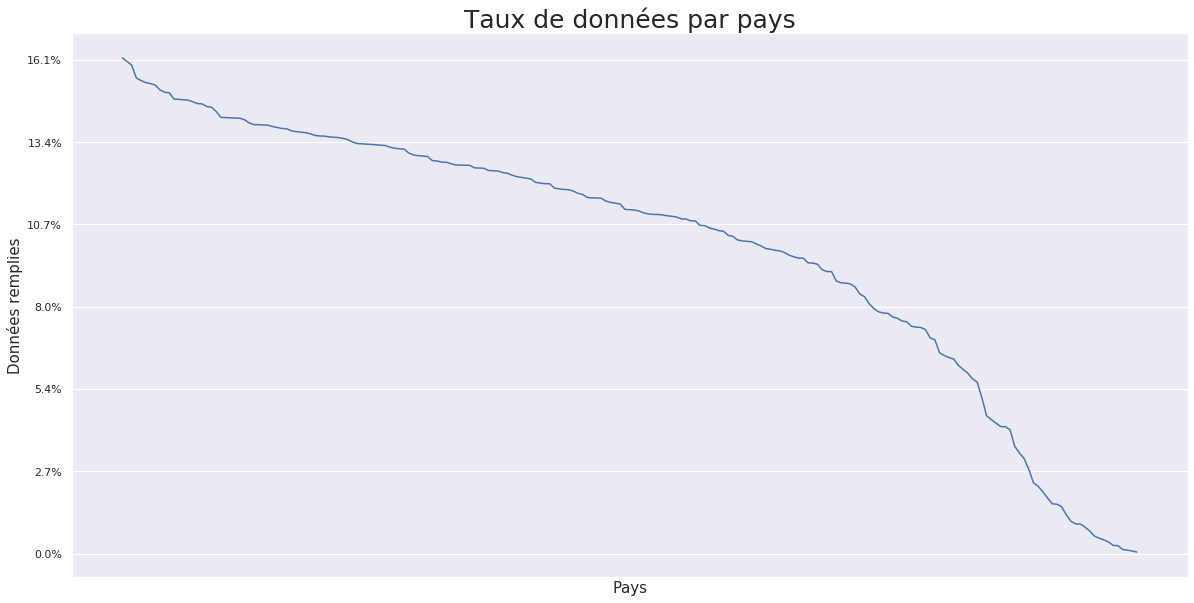

In [0]:
# Nous allons construire un diagramme en bâtons présentant le nombre de valeurs par pays
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

countries = list(gb_country_count.index)
completed_rate = gb_country_count["Total"]

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Taux de données par pays", fontsize=25)
plt.xticks([])
plt.xlabel("Pays", fontsize=15)
plt.ylabel("Données remplies", fontsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=186915))
plot = ax.plot(countries, completed_rate)

Nous constatons que le taux de remplissage par pays est en moyenne plus élevé, mais aussi plus hétérogène que pour les régions (zones).

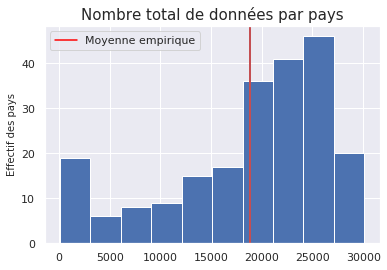

In [0]:
# Histogramme du nombre de données par pays
completed_rate = gb_country_count["Total"]

plt.title("Nombre total de données par pays", fontsize=15)
xbar = completed_rate.mean()# moyenne empirique
plt.axvline(xbar, color='r', linewidth=2)
plt.ylabel("Effectif des pays", fontsize=10)
plot = plt.hist(completed_rate, bins=10) #  Default : bins = 10

import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

## Étude du remplissage par pays, en nombre d'indicateurs

In [0]:
# On fait un tableau croisé des pays et des indicateurs par rapport au décompte
data_pt2 = data.pivot_table('Indicator_filled_by_country', index=['Country Name'], columns=['Indicator Code'
                           ], aggfunc="sum")

# Nous sommons sur la ligne pour avoir le nombre de pays qui ont renseignés l'indicateur
data_pt2['Count indicators'] = data_pt2.loc[:,"BAR.NOED.1519.FE.ZS":"XGDP.56.FSGOV.FDINSTADM.FFD"].sum(axis=1)


# Nous trions et affichons une valeur sur 20
data_pt2.sort_values("Count indicators",ascending=False)[::40]

Indicator Code,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,BAR.NOED.15UP.FE.ZS,BAR.NOED.15UP.ZS,BAR.NOED.2024.FE.ZS,BAR.NOED.2024.ZS,BAR.NOED.2529.FE.ZS,BAR.NOED.2529.ZS,BAR.NOED.25UP.FE.ZS,BAR.NOED.25UP.ZS,BAR.NOED.3034.FE.ZS,BAR.NOED.3034.ZS,BAR.NOED.3539.FE.ZS,BAR.NOED.3539.ZS,BAR.NOED.4044.FE.ZS,BAR.NOED.4044.ZS,BAR.NOED.4549.FE.ZS,BAR.NOED.4549.ZS,BAR.NOED.5054.FE.ZS,BAR.NOED.5054.ZS,BAR.NOED.5559.FE.ZS,BAR.NOED.5559.ZS,BAR.NOED.6064.FE.ZS,BAR.NOED.6064.ZS,BAR.NOED.6569.FE.ZS,BAR.NOED.6569.ZS,BAR.NOED.7074.FE.ZS,BAR.NOED.7074.ZS,BAR.NOED.75UP.FE.ZS,BAR.NOED.75UP.ZS,BAR.POP.1519,BAR.POP.1519.FE,BAR.POP.15UP,BAR.POP.15UP.FE,BAR.POP.2024,BAR.POP.2024.FE,BAR.POP.2529,BAR.POP.2529.FE,BAR.POP.25UP,BAR.POP.25UP.FE,...,UIS.XSPENDP.4.FDPUB.FNCUR,UIS.XSPENDP.4.FDPUB.FNNONS,UIS.XSPENDP.4.FDPUB.FNS,UIS.XSPENDP.56.FDPUB.FNCAP,UIS.XSPENDP.56.FDPUB.FNCUR,UIS.XSPENDP.56.FDPUB.FNNONS,UIS.XSPENDP.56.FDPUB.FNS,UIS.XSPENDP.FDPUB.FNCAP,UIS.XSPENDP.FDPUB.FNNONS,UIS.XSPENDP.FDPUB.FNS,UIS.XUNIT.GDPCAP.2.FSGOV,UIS.XUNIT.GDPCAP.3.FSGOV,UIS.XUNIT.GDPCAP.4.FSGOV,UIS.XUNIT.PPP.1.FSGOV,UIS.XUNIT.PPP.2.FSGOV,UIS.XUNIT.PPP.23.FSGOV,UIS.XUNIT.PPP.3.FSGOV,UIS.XUNIT.PPP.4.FSGOV,UIS.XUNIT.PPP.56.FSGOV,UIS.XUNIT.PPPCONST.1.FSGOV,UIS.XUNIT.PPPCONST.2.FSGOV,UIS.XUNIT.PPPCONST.23.FSGOV,UIS.XUNIT.PPPCONST.3.FSGOV,UIS.XUNIT.PPPCONST.4.FSGOV,UIS.XUNIT.PPPCONST.56.FSGOV,UIS.XUNIT.US.1.FSGOV,UIS.XUNIT.US.2.FSGOV,UIS.XUNIT.US.23.FSGOV,UIS.XUNIT.US.3.FSGOV,UIS.XUNIT.US.4.FSGOV,UIS.XUNIT.US.56.FSGOV,UIS.XUNIT.USCONST.1.FSGOV,UIS.XUNIT.USCONST.2.FSGOV,UIS.XUNIT.USCONST.23.FSGOV,UIS.XUNIT.USCONST.3.FSGOV,UIS.XUNIT.USCONST.4.FSGOV,UIS.XUNIT.USCONST.56.FSGOV,XGDP.23.FSGOV.FDINSTADM.FFD,XGDP.56.FSGOV.FDINSTADM.FFD,Count indicators
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Colombia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2462
Lesotho,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,1,2078
Portugal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1958
Japan,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1814
St. Lucia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1343
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,407
Northern Mariana Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


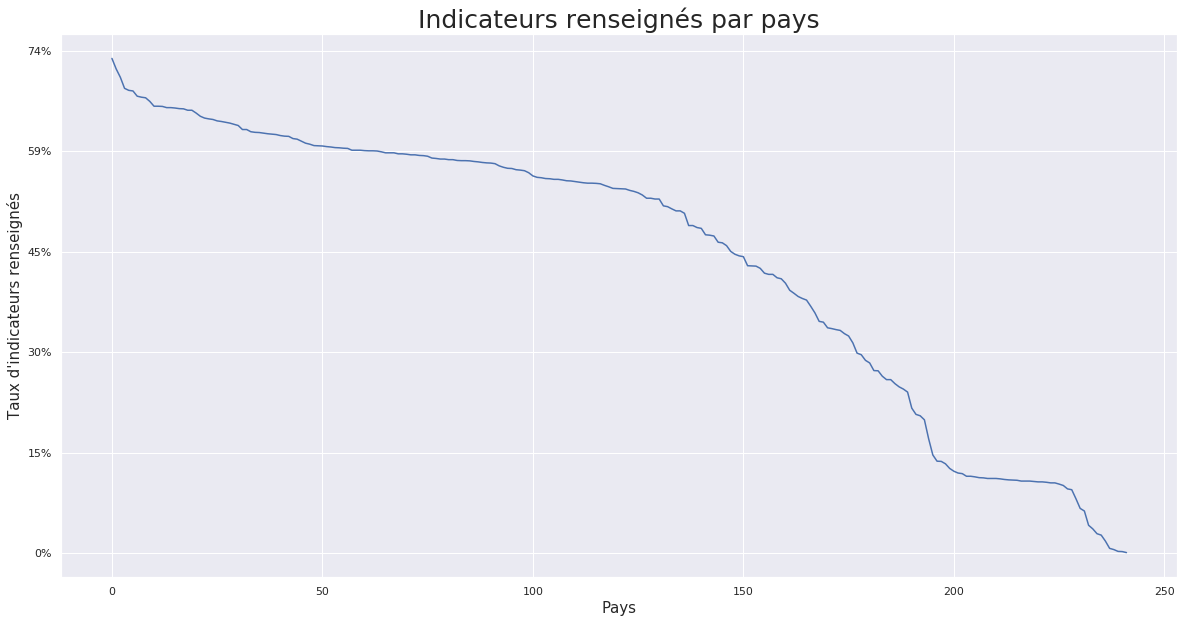

In [0]:
# # Nous allons construire un diagramme en bâtons présentant le nombre de valeurs par indicateur
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

countries = range(len(data_pt2))
completed_indicators = data_pt2.sort_values('Count indicators',ascending=False)['Count indicators']

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Indicateurs renseignés par pays", fontsize=25)
plt.xlabel("Pays", fontsize=15)
plt.ylabel("Taux d'indicateurs renseignés", fontsize=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=3365))
plot = ax.plot(countries, completed_indicators)

# Récupération des "indicateurs généraux"
Nous avons vu plus haut que les indicateurs se décomposent le plus souvent en sous-indicateurs. Nous allons essayer de séparer les « indicateurs généraux » et les sous-indicateurs en utilisant un script.

In [0]:
# Définition d'une table des indicateurs
indics = df_data[["Indicator Code", "Indicator Name"]]
indics = indics.drop_duplicates()
indics = indics.set_index("Indicator Code")
indics.loc[::500]

,Indicator Name
Indicator Code,
UIS.NERA.2,"Adjusted net enrolment rate, lower secondary, both sexes (%)"
BAR.POP.5559,"Barro-Lee: Population in thousands, age 55-59, total"
LO.EGRA.CWPM.ZERO.SID.2GRD,EGRA: Oral Reading Fluency - Share of students with a zero score (%). Sidaamu Afoo. 2nd Grade
LO.LLECE.SCI6.4.MA,LLECE: Male 6th grade students by science proficiency level (%). Level 4
UIS.REPP.1.G7,"Percentage of repeaters in Grade 7 of primary education, both sexes (%)"
SP.POP.0509.MA.UN,"Population, ages 5-9, male"
LO.TIMSS.SCI4.P90,TIMSS: Distribution of 4th Grade Science Scores: 90th Percentile Score
PRJ.ATT.2529.2.MF,Wittgenstein Projection: Percentage of the population age 25-29 by highest level of educational attainment. Lower Secondary. Total


In [0]:
def is_sous_indic(indicateur1, indicateur2):
    """Fonction décomposant les codes des indicateurs en mots clefs et regardant si ils sont une
    sous-liste d'un autre indicateur"""
    if indicateur1==indicateur2:
        return False # si les deux indicateurs sont les mêmes
    ind1 = indicateur1.split(".")
    # On nettoie les mots clefs qui généralisent : ALL, ZS, MF…
    ind1 = list(set(ind1) - set(("ALL","MF","ZS","TO","T","TOT","TOTL")))
    ind2 = indicateur2.split(".")

    checklist = [ i in ind2 for i in ind1 ]
    for check in checklist:
        if check==False:
            return False # indicateur2 n'est pas un sous-indicateur de indicateur1
        else:
            pass
    return True

In [0]:
# Script pour récupérer les indicateurs principaux et les sous-indicateurs
indics["Children Indicators"] = None
indics["Parents Indicators"] = None
liste_codes_indicateurs = list(indics.index.unique())

for indicateur in liste_codes_indicateurs:
    for autre_indicateur in liste_codes_indicateurs :
        # Si les mots clefs de l'indicateur sont un sous-ensemble des mots clefs de autre_indicateur
        if is_sous_indic(indicateur, autre_indicateur) and indicateur!=autre_indicateur:
            try:
                indics.loc[indicateur]['Children Indicators'].append(autre_indicateur)
            except AttributeError:
                indics.loc[indicateur]['Children Indicators']=[autre_indicateur]
            
            try:
                indics.loc[autre_indicateur]['Parents Indicators'].append(indicateur)
            except AttributeError:
                indics.loc[autre_indicateur]['Parents Indicators']=[indicateur]

In [0]:
indics.sort_values(by="Indicator Code").head()

,Indicator Name,Children Indicators,Parents Indicators
Indicator Code,,,
BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age 15-19 with no education,None,[BAR.NOED.1519.ZS]
BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 with no education,[BAR.NOED.1519.FE.ZS],None
BAR.NOED.15UP.FE.ZS,Barro-Lee: Percentage of female population age 15+ with no education,None,[BAR.NOED.15UP.ZS]
BAR.NOED.15UP.ZS,Barro-Lee: Percentage of population age 15+ with no education,[BAR.NOED.15UP.FE.ZS],None
BAR.NOED.2024.FE.ZS,Barro-Lee: Percentage of female population age 20-24 with no education,None,[BAR.NOED.2024.ZS]


In [0]:
# On récupère la liste des indicateurs sans parents
indics_without_parents = indics[indics["Parents Indicators"].isnull()]
print("Il y a {} indicateurs sans parents.".format(len(indics_without_parents)))

list_indics_without_parents = list(indics_without_parents.index)

Il y a 1000 indicateurs sans parents.


In [0]:
# On récupère la liste des indicateurs sans parents mais avec enfants
indics_masters = indics[indics["Parents Indicators"].isnull()& indics["Children Indicators"].notnull()]
print("Il y a {} indicateurs sans parents mais avec enfants.".format(len(indics_masters)))

list_indics_masters = list(indics_masters.index)

Il y a 476 indicateurs sans parents mais avec enfants.


In [0]:
# On affiche cette liste
sorted(list_indics_masters)[:10]

['BAR.NOED.1519.ZS',
 'BAR.NOED.15UP.ZS',
 'BAR.NOED.2024.ZS',
 'BAR.NOED.2529.ZS',
 'BAR.NOED.25UP.ZS',
 'BAR.NOED.3034.ZS',
 'BAR.NOED.3539.ZS',
 'BAR.NOED.4044.ZS',
 'BAR.NOED.4549.ZS',
 'BAR.NOED.5054.ZS']

Nous constatons qu'il reste encore dans ces différentes listes beaucoup d'indicateurs qui sont comme des déclinaisons d'un même indicateur, sans qu'il existe réellement un indicateur "parent" permettant de les généraliser.

# Jonction des informations sur les indicateurs
Pour l'instant, nous avons étudiés les indicateurs sous plusieurs angles :
* existence d'indicateurs parents et/ou enfants
* calcul du taux de remplissage de l'indicateur :
    * par pays
    * par région
    * global

Nous souhaitons maintenant regrouper toutes ces informations au sein d'un seul et unique dataframe afin de sélectionner les indicateurs les plus pertinents pour notre analyse.

In [0]:
indics_merged = pd.merge(indics, data_gb_indicators['Count data (total)'], on='Indicator Code')
indics_merged = pd.merge(indics_merged, data_gb_indicators["Count years"], on='Indicator Code')
indics_merged = pd.merge(indics_merged, data_pt['Count countries'], on='Indicator Code')

In [0]:
# On affiche les 5 premiers indicateurs sans parents, triés par taux de remplissage.
indics_merged[indics_merged["Parents Indicators"].isnull()].sort_values(by='Count data (total)', ascending=False).head(5)

,Indicator Name,Children Indicators,Parents Indicators,Count data (total),Count years,Count countries
Indicator Code,,,,,,
SP.POP.TOTL,"Population, total","[SP.POP.GROW, SP.POP.AG00.FE.UN, SP.POP.AG00.MA.UN, SP.POP.AG00.TO.UN, SP.POP.AG01.FE.UN, SP.POP.AG01.MA.UN, SP.POP.AG01.TO.UN, SP.POP.AG10.FE.UN, SP.POP.AG10.MA.UN, SP.POP.AG10.TO.UN, SP.POP.AG11.FE.UN, SP.POP.AG11.MA.UN, SP.POP.AG11.TO.UN, SP.POP.AG12.FE.UN, SP.POP.AG12.MA.UN, SP.POP.AG12.TO.UN, SP.POP.AG13.FE.UN, SP.POP.AG13.MA.UN, SP.POP.AG13.TO.UN, SP.POP.AG14.FE.UN, SP.POP.AG14.MA.UN, SP.POP.AG14.TO.UN, SP.POP.AG15.FE.UN, SP.POP.AG15.MA.UN, SP.POP.AG15.TO.UN, SP.POP.AG16.FE.UN, SP.POP.AG16.MA.UN, SP.POP.AG16.TO.UN, SP.POP.AG17.FE.UN, SP.POP.AG17.MA.UN, SP.POP.AG17.TO.UN, SP.POP.AG18.FE.UN, SP.POP.AG18.MA.UN, SP.POP.AG18.TO.UN, SP.POP.AG19.FE.UN, SP.POP.AG19.MA.UN, SP.POP.AG19.TO.UN, SP.POP.AG02.FE.UN, SP.POP.AG02.MA.UN, SP.POP.AG02.TO.UN, SP.POP.AG20.FE.UN, SP.POP.AG20.MA.UN, SP.POP.AG20.TO.UN, SP.POP.AG21.FE.UN, SP.POP.AG21.MA.UN, SP.POP.AG21.TO.UN, SP.POP.AG22.FE.UN, SP.POP.AG22.MA.UN, SP.POP.AG22.TO.UN, SP.POP.AG23.FE.UN, SP.POP.AG23.MA.UN, SP.POP.AG23.TO.UN, SP.POP.AG24.F...",None,0.903824,47,240
SP.PRE.TOTL.IN,"Population of the official age for pre-primary education, both sexes (number)","[SP.PRE.TOTL.FE.IN, SP.PRE.TOTL.MA.IN]",None,0.815427,47,226
SP.SEC.TOTL.IN,"Population of the official age for secondary education, both sexes (number)","[SP.SEC.LTOT.IN, SP.SEC.LTOT.FE.IN, SP.SEC.LTOT.MA.IN, SP.SEC.TOTL.FE.IN, SP.SEC.TOTL.MA.IN, SP.SEC.UTOT.IN, SP.SEC.UTOT.FE.IN, SP.SEC.UTOT.MA.IN]",None,0.813725,47,226
UIS.SAP.1.G1,"Population of the official entrance age to primary education, both sexes (number)","[UIS.SAP.1.G1.F, UIS.SAP.1.G1.M]",None,0.810241,47,225
SP.PRM.TOTL.IN,"Population of the official age for primary education, both sexes (number)","[SP.PRM.TOTL.FE.IN, SP.PRM.TOTL.MA.IN]",None,0.809998,47,226


In [0]:
indics_merged[indics_merged["Parents Indicators"].isnull()].sort_values(by='Count data (total)', ascending=False)

,Indicator Name,Children Indicators,Parents Indicators,Count data (total),Count years,Count countries
Indicator Code,,,,,,
SP.POP.TOTL,"Population, total","[SP.POP.GROW, SP.POP.AG00.FE.UN, SP.POP.AG00.MA.UN, SP.POP.AG00.TO.UN, SP.POP.AG01.FE.UN, SP.POP.AG01.MA.UN, SP.POP.AG01.TO.UN, SP.POP.AG10.FE.UN, SP.POP.AG10.MA.UN, SP.POP.AG10.TO.UN, SP.POP.AG11.FE.UN, SP.POP.AG11.MA.UN, SP.POP.AG11.TO.UN, SP.POP.AG12.FE.UN, SP.POP.AG12.MA.UN, SP.POP.AG12.TO.UN, SP.POP.AG13.FE.UN, SP.POP.AG13.MA.UN, SP.POP.AG13.TO.UN, SP.POP.AG14.FE.UN, SP.POP.AG14.MA.UN, SP.POP.AG14.TO.UN, SP.POP.AG15.FE.UN, SP.POP.AG15.MA.UN, SP.POP.AG15.TO.UN, SP.POP.AG16.FE.UN, SP.POP.AG16.MA.UN, SP.POP.AG16.TO.UN, SP.POP.AG17.FE.UN, SP.POP.AG17.MA.UN, SP.POP.AG17.TO.UN, SP.POP.AG18.FE.UN, SP.POP.AG18.MA.UN, SP.POP.AG18.TO.UN, SP.POP.AG19.FE.UN, SP.POP.AG19.MA.UN, SP.POP.AG19.TO.UN, SP.POP.AG02.FE.UN, SP.POP.AG02.MA.UN, SP.POP.AG02.TO.UN, SP.POP.AG20.FE.UN, SP.POP.AG20.MA.UN, SP.POP.AG20.TO.UN, SP.POP.AG21.FE.UN, SP.POP.AG21.MA.UN, SP.POP.AG21.TO.UN, SP.POP.AG22.FE.UN, SP.POP.AG22.MA.UN, SP.POP.AG22.TO.UN, SP.POP.AG23.FE.UN, SP.POP.AG23.MA.UN, SP.POP.AG23.TO.UN, SP.POP.AG24.F...",None,0.903824,47,240
SP.PRE.TOTL.IN,"Population of the official age for pre-primary education, both sexes (number)","[SP.PRE.TOTL.FE.IN, SP.PRE.TOTL.MA.IN]",None,0.815427,47,226
SP.SEC.TOTL.IN,"Population of the official age for secondary education, both sexes (number)","[SP.SEC.LTOT.IN, SP.SEC.LTOT.FE.IN, SP.SEC.LTOT.MA.IN, SP.SEC.TOTL.FE.IN, SP.SEC.TOTL.MA.IN, SP.SEC.UTOT.IN, SP.SEC.UTOT.FE.IN, SP.SEC.UTOT.MA.IN]",None,0.813725,47,226
UIS.SAP.1.G1,"Population of the official entrance age to primary education, both sexes (number)","[UIS.SAP.1.G1.F, UIS.SAP.1.G1.M]",None,0.810241,47,225
SP.PRM.TOTL.IN,"Population of the official age for primary education, both sexes (number)","[SP.PRM.TOTL.FE.IN, SP.PRM.TOTL.MA.IN]",None,0.809998,47,226
...,...,...,...,...,...,...
LO.EGRA.CWPM.ZERO.AKU.2GRD,EGRA: Oral Reading Fluency - Share of students with a zero score (%). Akuapem. 2nd Grade,None,None,0.000081,1,1
LO.EGRA.CWPM.ZERO.AST.2GRD,EGRA: Oral Reading Fluency - Share of students with a zero score (%). Asante Twi. 2nd Grade,None,None,0.000081,1,1
LO.EGRA.CWPM.ZERO.CHI.2GRD,EGRA: Oral Reading Fluency - Share of students with a zero score (%). Chitonga. 2nd Grade,None,None,0.000081,1,1


# Étude du remplissage des indicateurs dans le temps

In [0]:
# SÉlection des indicateurs les plus remplis pour la dernière décennie

# On fait la somme des colonnes de 2010 à 2020, renvoie une pd.Series
data_sum = data_gb_indicators.loc[:,"2010":"2020"].sum(axis=1)

# On classe par ordre décroissant, et on affiche les premiers indicateurs
main_indics2010 = data_sum.sort_values(ascending=False)[:15]

# On récupère la liste de ces indicateurs
list_main_indics = list(main_indics2010.index)
list_main_indics

['SP.POP.TOTL',
 'SP.POP.GROW',
 'IT.NET.USER.P2',
 'NY.GDP.PCAP.CD',
 'NY.GDP.MKTP.CD',
 'NY.GDP.PCAP.KD',
 'NY.GDP.MKTP.KD',
 'SP.POP.1564.TO.ZS',
 'SP.POP.TOTL.MA.ZS',
 'SP.POP.0014.MA.IN',
 'SP.POP.0014.TO',
 'SP.POP.0014.FE.IN',
 'SP.POP.1564.FE.IN',
 'SP.POP.TOTL.FE.IN',
 'SP.POP.1564.TO']

Nous constatons que les indicateurs les plus remplis sur la décennie 2010-2020 sont ceux donnant :

* la population totale
    * la population moins de 15 ans
    * la population plus de 15 ans
    * la population féminine
* la croissance démographique
* le taux d'utilisation d'internet
* le PNB du pays

Ce sont, à l'exception de la population de plus de 15 ans et de la population féminine, des indicateurs qui sont pertinents pour notre problématique d'investissement.

In [0]:
# Nous faisons la même chose pour la première décennie des données 1970-1979

# On fait la somme des colonnes de 1970 à 1979, renvoie une pd.Series
data_sum = data_gb_indicators.loc[:,"1970":"1980"].sum(axis=1)

# On classe par ordre décroissant, et on affiche les premiers indicateurs
main_indics1970 = data_sum.sort_values(ascending=False)[:15]

# On récupère la liste de ces indicateurs
list_main_indics1970 = list(main_indics2010.index)

# On l'ajoute à la liste des indicateurs importantas
for indic in list_main_indics1970:
    if indic not in list_main_indics:
        list_main_indics.append(indic)

list_main_indics

['SP.POP.TOTL',
 'SP.POP.GROW',
 'IT.NET.USER.P2',
 'NY.GDP.PCAP.CD',
 'NY.GDP.MKTP.CD',
 'NY.GDP.PCAP.KD',
 'NY.GDP.MKTP.KD',
 'SP.POP.1564.TO.ZS',
 'SP.POP.TOTL.MA.ZS',
 'SP.POP.0014.MA.IN',
 'SP.POP.0014.TO',
 'SP.POP.0014.FE.IN',
 'SP.POP.1564.FE.IN',
 'SP.POP.TOTL.FE.IN',
 'SP.POP.1564.TO']

Nous constatons qu'à l'exception de l'indicateur portant sur le pourcentage d'utilisateurs d'internet, ce sont globalement les mêmes indicateurs qui ont été les plus remplis dans les années 1970 et dans les années 2010.

In [0]:
def select_data(indicator_code, perimetre):
    """Fonction permettant de sélectionner les données relatives à l'indicateur concerné et aux pays/régions"""
    mask_indic = (data_cleaned["Indicator Code"]==indicator_code)
    mask_perim = (data_cleaned["Country Name"].apply(lambda x: True if x in perimetre else False))
    result = data_cleaned[mask_indic & mask_perim]
    return result

In [0]:
def filling_evolution(indicators, perimeter=liste_pays):
    """Fonction traçant le graphe de l'évolution du remplissage d'un indicateur"""
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    
    # On récupère le nombre de pays (donc le nombre de données maximum par années)
    max_data = len(perimeter)
    
    # On définie les informations principales du graphique
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title("Évolution du remplissage des indicateurs" , fontsize=25)
    plt.xlabel("Années", fontsize=15)
    plt.ylabel("Taux de remplissage de l'indicateur", fontsize=15)
    plt.xticks(rotation=35)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=max_data))
    
    for indicator_code in indicators:
        
        # Selection of the data
        data_selection = select_data(indicator_code, perimeter)

        # On récupère le nom de l'indicateur
        indicator_name = data_selection["Indicator Name"].iloc[0]

        # On compte le nombre de données remplies par année
        gb = data_selection.groupby('Indicator Code').count()

        # On récupère les années
        years = list(gb.loc[:,"1970":"2100"])

        # On récupère les valeurs correspondantes
        values = [ int(gb[year]) for year in years ]
        
            # On nettoie les années finales vides
        for (year, value) in zip(reversed(years), reversed(values)):
            if value == 0:
                del values[-1]
                del years[-1]
            else:
                break
   
        # Nous traçons le graphe pour l'indicateur
        plot = ax.plot(years, values,'-o', label=indicator_name)
        plt.legend()
    fig.savefig('plot.png')

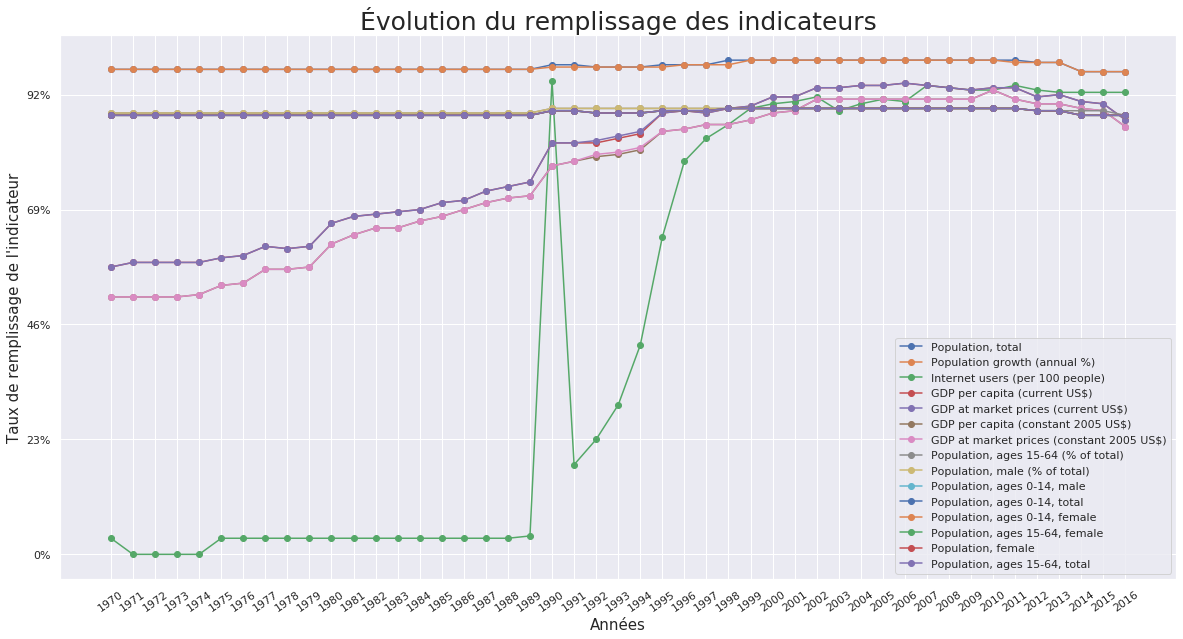

In [0]:
indicators = list_main_indics
perimeter = liste_pays
filling_evolution(indicators, perimeter)

Nous constatons que les indicateurs les mieux renseignés sur la première décennie restent bien documentés dans le temps. Cela indique qu'ils permettent une étude sur le long terme.

# Définition de fonctions utiles pour l'étude statistique
Nous avons sélectionnés quelques indicateurs généraux et allons maintenant étudier plus en détail ces données par région (zone). Nous commençons par élaborer quelques fonctions qui nous serons utiles pur notre analyse.

## Fonctions de récupération

### Liste des pays appartenant à une région

In [0]:
# Fonction permettant de récupérer la liste des pays à partir du nom d'une région
country_df = pd.read_csv(images_dir + "/EdStatsCountry.csv")

def countries_from_region(region_name):
    """Permet de récupérer la liste des pays appartenant à une région."""
    return list(country_df[country_df["Region"] == region_name]["Table Name"])

# Exemple d'utilisation : pays de la région Europe et Asie centale
# print(countries_from_region("Europe & Central Asia"))

### Liste des indicateurs contenant un mot clé

In [0]:
# Script qui permet d'obtenir la liste des indicateurs qui contiennent un mot clé dans leur nom
def indicators_with_kw(keyword):
    """Function displaying the description and returning the list of indicators containing a keyword given as argument."""
    
    # Filtering the indics_merged (DataFrame) on keyword
    result = indics_merged[indics_merged["Indicator Name"].str.contains(keyword, case=False)]
    
    # Display the code and name of indicator
    print(result["Indicator Name"])
    
    # Convert to a list of indicator codes
    indicators_list = list(result.index)
    
    # Return the list
    return indicators_list

# Exemple d'utilisation
# indicators_list = indicators_with_kw("internet")

### Dernière valeur connue pour un indicateur et un pays donné

In [0]:
import math

def last_value(indicator_code, country_name):
    """Fonction renvoyant le tuple (année, valeur) pour la dernière valeur renseignée d'un indicateur."""

    # On récupère la ligne correspondant au pays et à l'indicateur
    mask = (df_data["Indicator Code"]==indicator_code) & (df_data["Country Name"]==country_name)
    data_masked = df_data[mask]
    index = data_masked.index
    
    # On récupère la liste des années de 1970 à 2017
    years=list(data.loc[:,"1970":"2017"])
    
    # Nous bouclons sur chaque colonne (année) pour récupérer la dernière valeur connue
    for year in reversed(years):
        value = float(data_masked.loc[index][year])
        if not math.isnan(value):
            return (year, value)

# Exemple d'utilisation
indicator_code = "NY.GDP.PCAP.KD"
country_name = "France"
# last_value(indicator_code, country_name)

### Liste des pays ayant la plus haute valeur pour un indicateur

In [0]:
def top_countries_by_indic(indicator_code, perimeter, topn=5):
    """Fonction renvoyant la liste des pays ayant la valeur d'un indicateur la plus élevée."""
    # Initialisation
    top_values = []
    
    for country in perimeter:
        
        try: # On gère le cas où l'indicateur n'est pas renseigné du tout
            # On récupère la valeur
            value_country = last_value(indicator_code, country)[1]
            
        except:
            pass
        else:
            if (len(top_values) < topn):
                # on ajoutre le tuple (pays, valeur) à la liste
                top_values.append((country, value_country))
                # on trie la liste de tuple par valeur
                top_values.sort(key=lambda tup: tup[1], reverse=True) # dans l'ordre décroissant
            else:
                # si la dernière valeur connue du pays est plus grande que la dernière
                if value_country > top_values[topn-1][1]:
                    top_values[topn-1] = (country, value_country)
                    top_values.sort(key=lambda tup: tup[1], reverse=True) # dans l'ordre décroissant
        
    top_countries = [tup[0] for tup in top_values]
    return top_countries

## Définition de fonctions de représentation graphique

### Graphe pour l'évolution d'un indicateur

In [0]:
def graph_evolution(data_selection):
    """Fonction traçant le graphe de l'évolution d'un indicateur"""
    import matplotlib.pyplot as plt

    # On récupère le nom de l'indicateur
    indicator_name = data_selection["Indicator Name"].iloc[0]
    indicator_code = data_selection["Indicator Code"].iloc[0]

    # On définie les informations principales du graphique
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title("Évolution de l'indicateur : "+ " [" + indicator_code + "] \n"+indicator_name , fontsize=25)
    plt.xlabel("Années", fontsize=15)
    plt.ylabel("Valeur de l'indicateur", fontsize=15)
    plt.xticks(rotation=35)

    # On récupère les années pour lesquelles l'indicateur est renseigné
    years=[]
    for year in list(data_selection.loc[:,"1970":"2100"]):
        if data_selection.count()[year] != 0: # On compte le nombre de valeurs
            years.append(year)

    # Nous bouclons sur chaque ligne (pays/région)
    legends=[]
    for index, raw in data_selection.iterrows():
        # Nous ajoutons le pays à la légende
        legends.append(raw["Country Name"])

        # Nous bouclons sur chaque colonne (année) pour récupérer la série temporelle de l'indicateur
        indicator_years = []
        indicator_values = []
        for year in years:
            indicator_years.append(year)
            indicator_values.append(raw[year])

        # Nous traçons le graphe pour le pays/region
        plot = ax.plot(indicator_years, indicator_values,'-o')

    plt.legend(legends)
    fig.savefig('plot.png')

### Diagrammes circulaires

In [0]:
def piechart_lastvalue(data_selection):
    """Fonction traçant un diagramme circulaire avec la dernière valeur connue d'un indicateur"""

    import matplotlib.pyplot as plt
    import seaborn as sns
    import math
    
    sns.set()


    # On récupère le nom de l'indicateur
    indicator_name = data_selection["Indicator Name"].iloc[0]
    indicator_code = data_selection["Indicator Code"].iloc[0]

    # On définie les informations principales du graphique
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title("Valeur de l'indicateur : "+ " [" + indicator_code + "] \n"+indicator_name , fontsize=25)
    ax.axis("equal")

    # On récupère la liste des années de 1970 à 2017
    years=list(data_selection.loc[:,"1970":"2017"])
    
    last_values = []
    # Nous bouclons sur chaque ligne (pays/région)
    for index, raw in data_selection.iterrows():

        # Nous bouclons sur chaque colonne (année) pour récupérer la dernière valeur connue
        for year in reversed(years):
            if not math.isnan(raw[year]):
                last_values.append(raw[year])
                break
    
    # On configure les effectifs et étiquettes
    frequencies = last_values
    labels = data_selection["Country Name"].unique()
    
    # Nous traçons le graphe
    ax.pie(frequencies,
        #labels=labels,
        # autopct='%1.1f%%'
          )
    plt.legend(labels)
    plt.show()
    fig.savefig('plot.png')

### Histogrammes

In [0]:
def graph_lastvalue(data_selection):
    """Fonction traçant un histogramme avec la dernière valeur connue d'un indicateur"""

    import matplotlib.pyplot as plt
    import math
    
    
    # On récupère le nom de l'indicateur
    indicator_name = data_selection["Indicator Name"].iloc[0]
    indicator_code = data_selection["Indicator Code"].iloc[0]

    # On définie les informations principales du graphique
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title("Valeur de l'indicateur : "+ " [" + indicator_code + "] \n"+indicator_name , fontsize=25)
    plt.xlabel("Dernière valeur connue", fontsize=15)
    plt.ylabel("Pays/Région", fontsize=15)
    plt.yticks(rotation=20)

    # On récupère la liste des années de 1970 à 2017
    years=list(data_selection.loc[:,"1970":"2017"])
    
    last_values = []
    # Nous bouclons sur chaque ligne (pays/région)
    for index, raw in data_selection.iterrows():

        # Nous bouclons sur chaque colonne (année) pour récupérer la dernière valeur connue
        for year in reversed(years):
            if not math.isnan(raw[year]):
                last_values.append(raw[year])
                break

    # On trie les données par valeur croissante
    data_loc=pd.DataFrame()
    data_loc["Country Name"] = data_selection["Country Name"]
    data_loc["last value"]= last_values
    data_loc = data_loc.sort_values(by='last value', ascending=False)
    
    # Nous traçons le graphe
    x=data_loc["Country Name"]
    y=data_loc["last value"]
    plot = ax.barh(x, y)
    fig.savefig('plot.png')

### Diagrammes en boîte

In [0]:
def graph_boxplot(data_selection):
    """Fonction traçant une « boîte-à-moustache » avec la dernière valeur connue d'un indicateur"""

    import matplotlib.pyplot as plt
    import math

    # On récupère le nom de l'indicateur
    indicator_name = data_selection["Indicator Name"].iloc[0]
    indicator_code = data_selection["Indicator Code"].iloc[0]

    # On définie les informations principales du graphique
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title("Boîte à moustache de l'indicateur : "+ " [" + indicator_code + "] \n"+indicator_name , fontsize=25)
    plt.xlabel("Dernière valeur connue", fontsize=15)

    # On récupère la liste des années de 1970 à 2017
    years=list(data_selection.loc[:,"1970":"2017"])

    # countries=[]
    indicator_value = []

    # Nous bouclons sur chaque ligne (pays/région)
    for index, raw in data_selection.iterrows():

        # Nous bouclons sur chaque colonne (année) pour récupérer la dernière valeur connue
        for year in reversed(years):
            if not math.isnan(raw[year]):
                indicator_value.append(raw[year])
                break
                
    # Propriétés graphiques pour la médiane et la moyenne
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

    # Nous traçons le graphe 
    plt.boxplot(indicator_value, showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.show()
    fig.savefig('plot.png')

# Étude statistique des indicateurs généraux

## Indicateur « population totale » (SP.POP.TOTL)
La première interrogation porte sur l'identification des pays à fort potentiel de clients. Nous commençons par étudier l'indicateur de population globale, par région géographique. Nous allons donc récupérer cette liste.

In [0]:
# On filtre la liste des régions pour éviter les doublons.
# Ex : France dans Euro area, Europe & Central Asia, European Union, High income, OECD members, World
country_df = pd.read_csv(images_dir + "/EdStatsCountry.csv")
liste_regions_geo = list(country_df["Region"].unique())

# On enlève une valeur nan
liste_regions_geo.remove(np.nan)

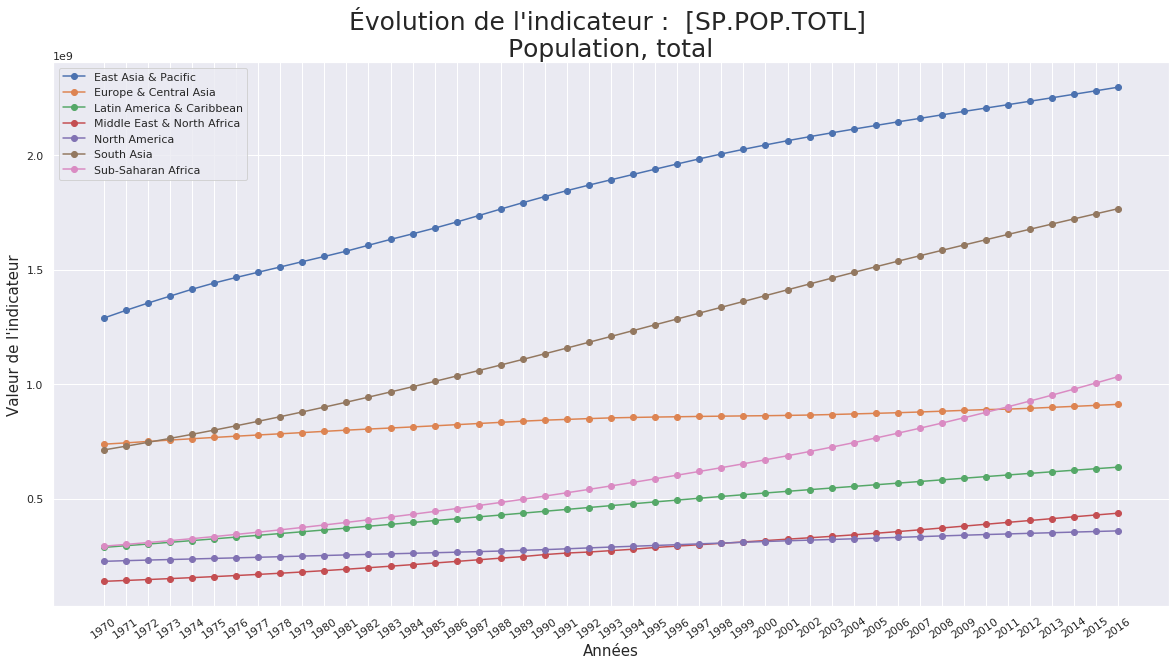

In [0]:
# On séléctionne les zones géographiques pour l'indicateur "SP.POP.TOTL"
# Et on trace le graphique correspondant
indicateur_code = "SP.POP.TOTL"
perimetre = liste_regions_geo
data_selection = select_data(indicateur_code, perimetre)
graph_evolution(data_selection)

Nous voyons que certaines zones ont une population importante et une croissance forte : 
* Asie de l'est et Pacifique
* Asie du sud
* Afrique sub-saharienne

Nous allons étudier un peu plus en détail, par pays, la région Asie du Sud.

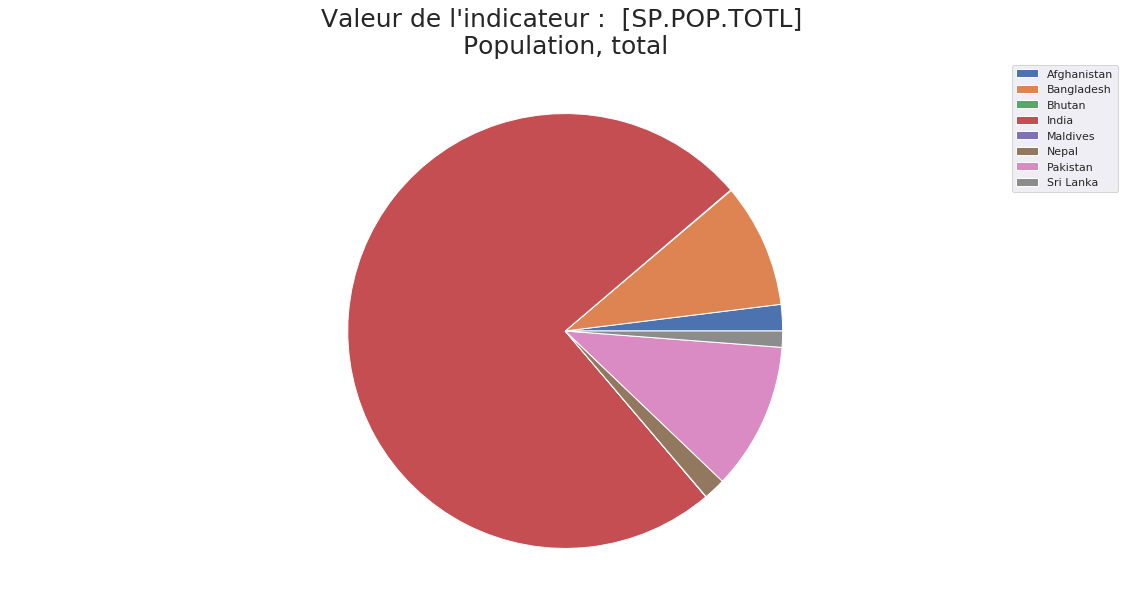

In [0]:
# On récupère la liste des pays de la région Asie du sud
south_asia = countries_from_region("South Asia")

# On sélectionne la vue correspondant à ces pays et à l'indicateur
perimetre = south_asia
indicator_code = "SP.POP.TOTL"
data_selection = select_data(indicator_code, perimetre)

# On trace le diagramme circulaire
piechart_lastvalue(data_selection)

Nous constatons que les 75% de la population d'Asie du Sud se concentre en Inde.

Après avoir étudié l'indicateur de la population globale, nous pouvons nous intéresser un peu plus précisément à un sous-indicateur : la population en âge d'être scolarisé au niveau du secondaire. En effet, la startup « academy » fait partie du secteur des EdTech et vise un public de niveau lycée et université. Les lycéens d'aujourd'hui sont donc les clients de demain !

## Indicateur « population du secondaire » (SP.SEC.TOTL.IN)

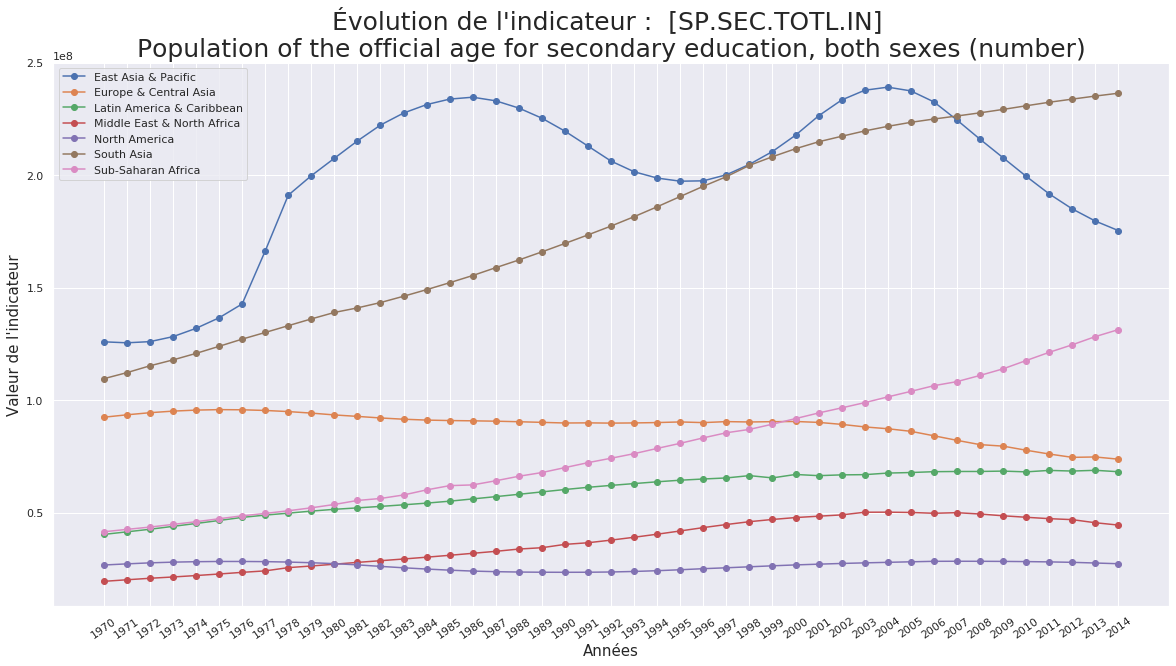

In [0]:
# On séléctionne les données régionales pour l'indicateur
# Et on trace le graphique correspondant
perimeter = liste_regions_geo
data_selection = select_data("SP.SEC.TOTL.IN", perimeter)
graph_evolution(data_selection)

Nous allons étudier un peu plus en détail la région Asie de l'Est et Pacifique. Nous remarquons néanmoins d'ors et déjà que la tendance sur cette région est baissière depuis 10 ans.

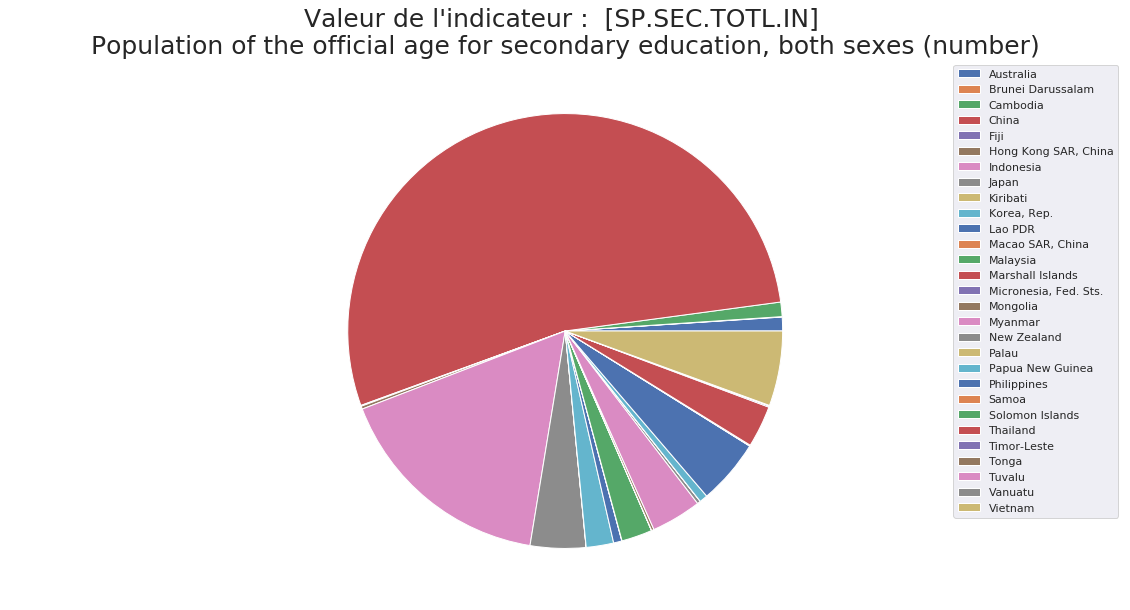

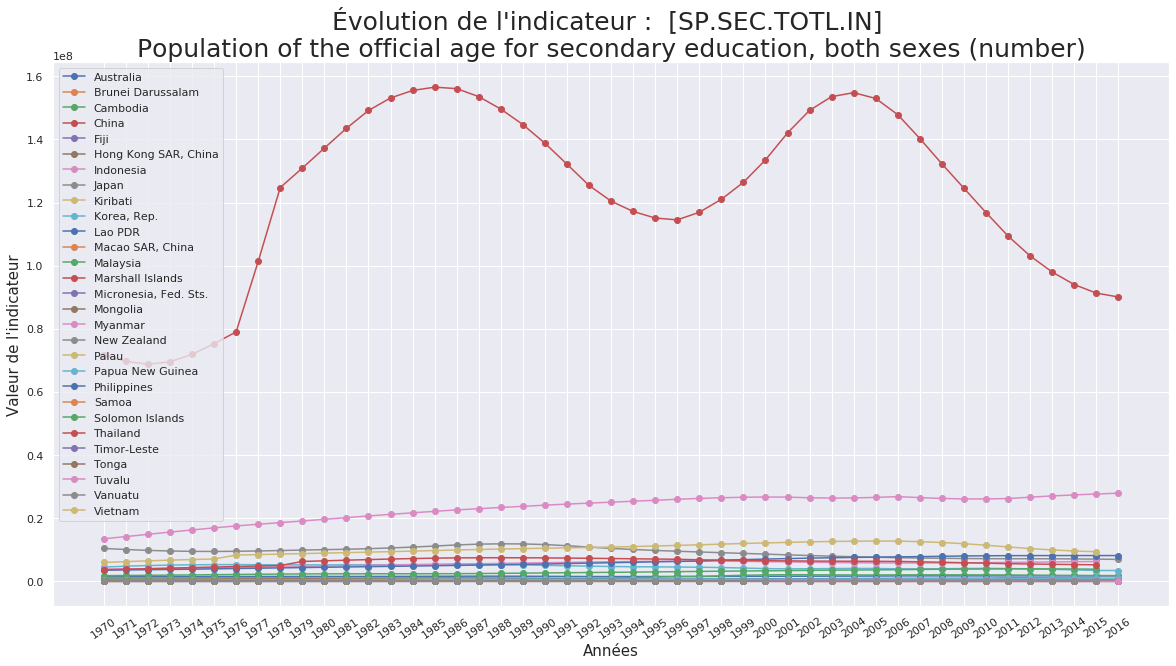

In [0]:
# On récupère la liste des pays de la région Asie du sud
east_asia = countries_from_region('East Asia & Pacific')

# On sélectionne la vue correspondant à ces pays et à l'indicateur
perimetre = east_asia
indicator_code = "SP.SEC.TOTL.IN"
data_selection = select_data(indicator_code, perimetre)

# On trace le diagramme circulaire et le graphe d'évolution
piechart_lastvalue(data_selection)
graph_evolution(data_selection)

Nous constatons que la Chine pèse pour plus de la moitié des effectifs de l'enseignement secondaire de la région. Nous constatons aussi que la baisse des effectifs de la région observée précédemment est intégralement lié à la Chine.

Cela révèle un vieillissement de la population vraissemblablement dû, pour la Chine, à la « politique de l'enfant unique ». Même si les dernières données semblent préfigurer un renversement de tendance, la Chine n'est peut-être pas un marché où le potentiel de client pour la startup « academy » pourrait se renforcer dans la durée.

## Indicateur « population de moins de 15 ans » (SP.POP.0014.TO)

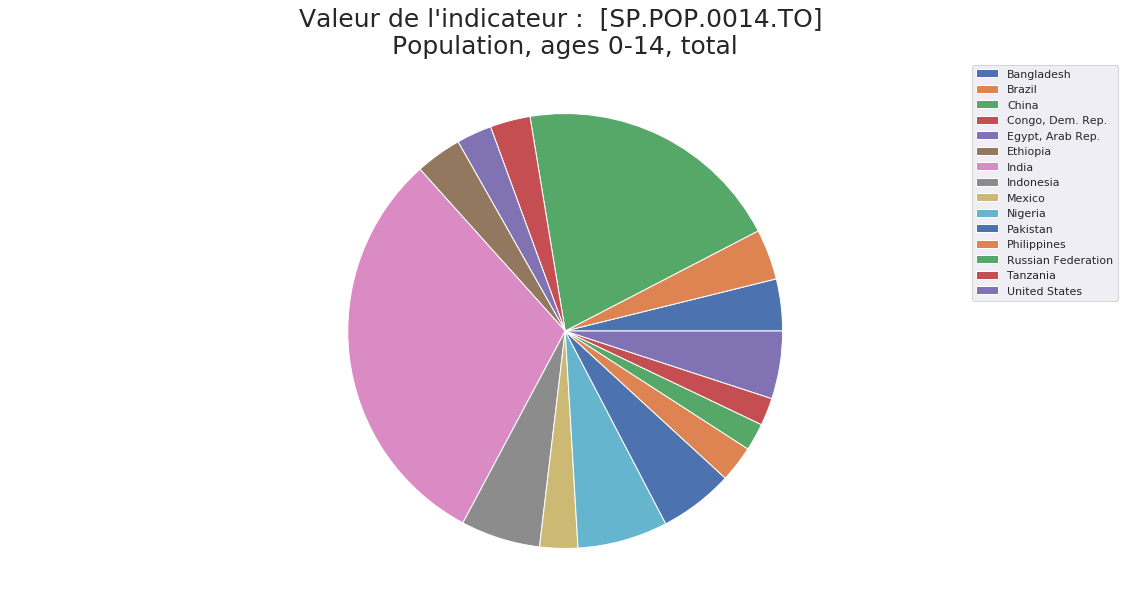

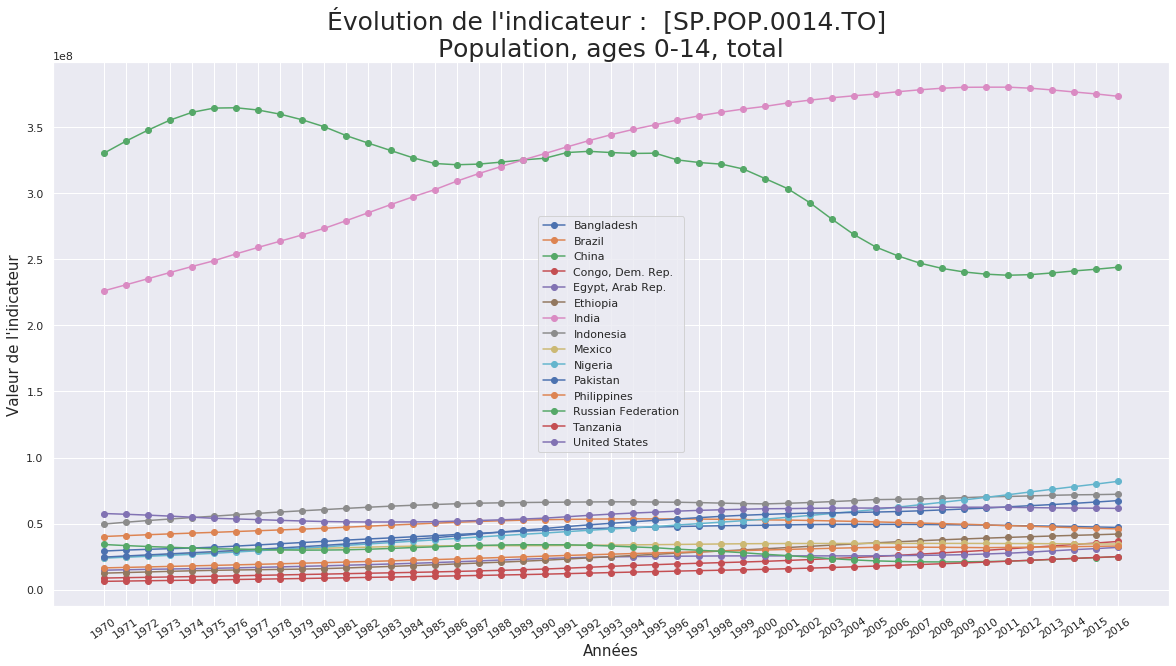

In [0]:
# On récupère la liste des 15 pays du monde où la population de moins de 15 ans est la plus importante
indicator_code = "SP.POP.0014.TO"
perimeter = liste_pays
perimeter = top_countries_by_indic(indicator_code, perimeter, topn=15)

# On sélectionne la vue correspondant à ces pays et à l'indicateur
data_selection = select_data(indicator_code, perimeter)


# On trace le diagramme circulaire et le graphe d'évolution
piechart_lastvalue(data_selection)
graph_evolution(data_selection)

De cette analyse ressortent clairement deux pays en terme d'effectifs de la jeunesse (0-14 ans) :
* Chine
* Inde

On peut également remarquer la tendance : l'Inde est sur une tendance haussière sur le long terme et la Chine sur une tendance baissière. Néanmoins, sur du court terme, ces deux tendances semblent s'inverser.

## Indicateur « PNB par habitant » (NY.GDP.PCAP.KD)
Après avoir briévement étudié la démographie des pays, nous pouvons regarder quels sont les régions les plus riches (richesse évaluée par le PNB par habitant), dans lesquels la population est la plus susceptible d'être solvable pour acheter les produits d'academy.

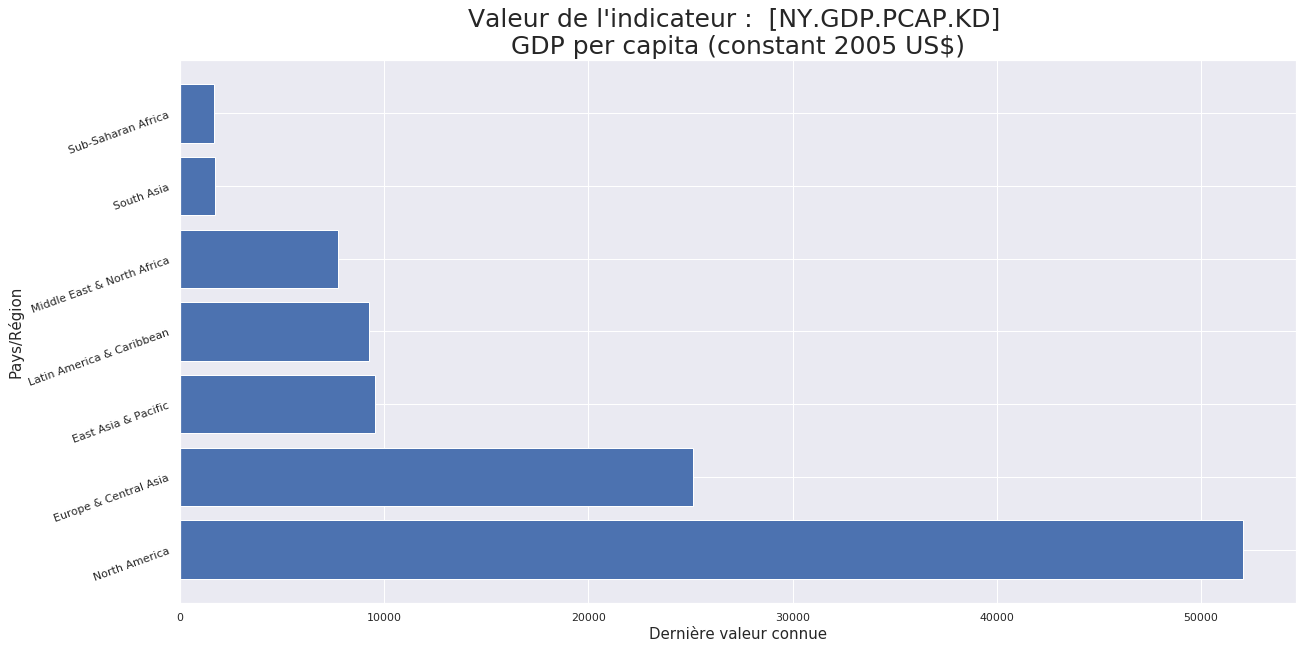

In [0]:
# On séléctionne d'abord la vue contenant l'indicateur pour tous les paysles pays ayant la plus haute valeur (dernière valeur connue) du PNB
# perimeter = top_countries
perimeter = liste_regions_geo
indicator_code = "NY.GDP.PCAP.KD"
data_selection = select_data(indicator_code,perimeter)

graph_lastvalue(data_selection)

Nous constatons que les pays ayant le PNB par habitant le plus élevé sont l'Amérique du Nord et la région Europe & Asie centrale.

## Indicateur « Taux de chômage » (SE.SEC.ENRL)
Un autre indicateur économique intéressant à étudier est le taux de chomâge. En effet, lorsque le chomâge est élevé, les jeunes peuvent avoir tendance à vouloir développer leurs compétences pour s'intégrer sur le marché du travail. Cela peut favoriser le marché d'academy.

In [0]:
# On séléctionne les données nationales pour l'indicateur
data_selection = select_data("SL.UEM.TOTL.ZS",liste_pays)

# Résumé statistique pour l'année 2014
data_selection["2014"].describe()

count    186.000000
mean       8.990323
std        6.525999
min        0.100000
25%        4.800000
50%        6.850000
75%       11.575000
max       31.200001
Name: 2014, dtype: float64

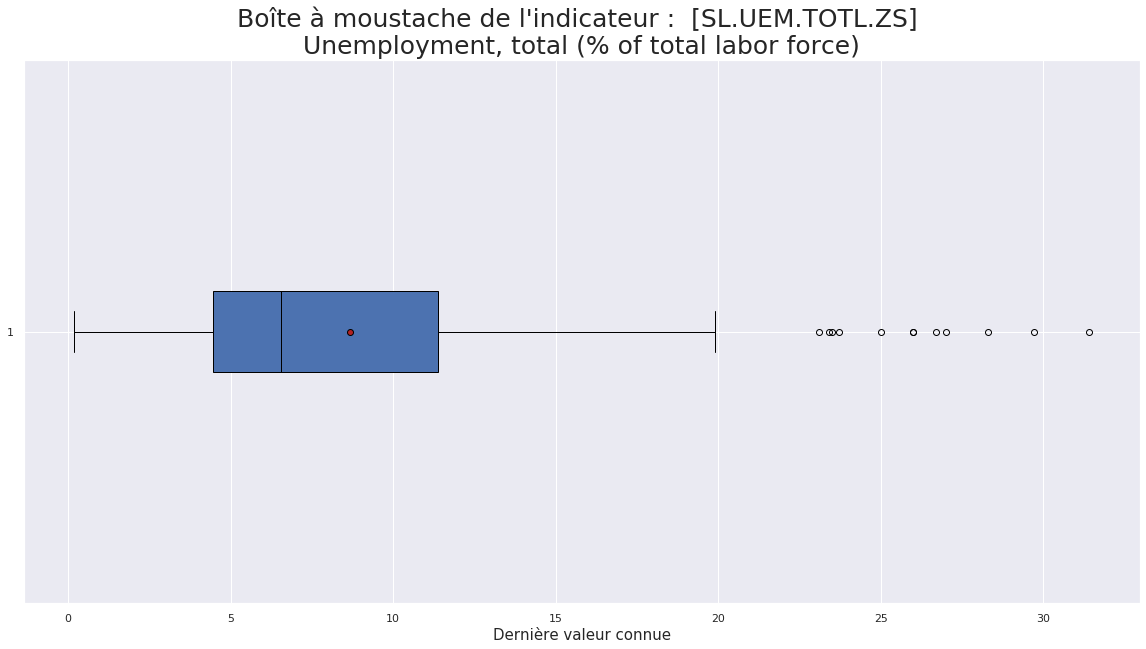

In [0]:
graph_boxplot(data_selection)

## Indicateur « Taux d'utilisation d'Internet» (IT.NET.USER.P2)
Pour une entreprise du secteur EdTech, la qualité de l'infrastructure réseau est de première importance. Le taux d'utilisation d'Internet est un indicateur critique.

In [0]:
# Sélection de la liste des indicateurs lié à internet
indicators_list = indicators_with_kw("internet")

Indicator Code
IT.NET.USER.P2    Internet users (per 100 people)
Name: Indicator Name, dtype: object


In [0]:
# On va sélectionner les 25 pays ayant le meilleur taux d'utilisation d'Internet
perimeter = liste_pays
indicator_code = "IT.NET.USER.P2"
top_countries = top_countries_by_indic(indicator_code, perimeter, topn=25)

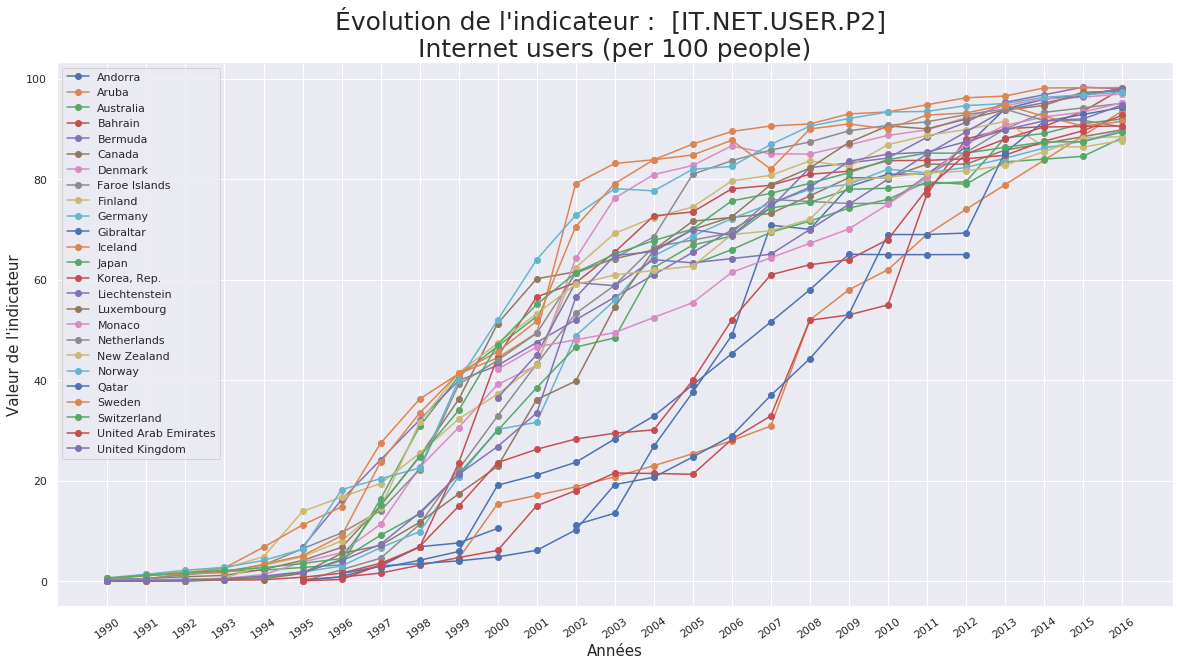

In [0]:
# On crée la vue sur les données pour l'indicateur et les pays
perimeter = top_countries
indicator_code = "IT.NET.USER.P2"
data_selection = select_data(indicator_code, perimeter)

# On va tracer le graphe d'évolution de l'indicateur
graph_evolution(data_selection)

Nous constatons que, en ce qui concerne le taux d'utilisateurs d'internet, les pays les plus « connectés » ont un taux de l'ordre de supérireure à 85%. Nous pouvons approfondir l'analyse avec une « boîte à moustaches » (diagramme en boîte) pour étudier la distribution statistique.

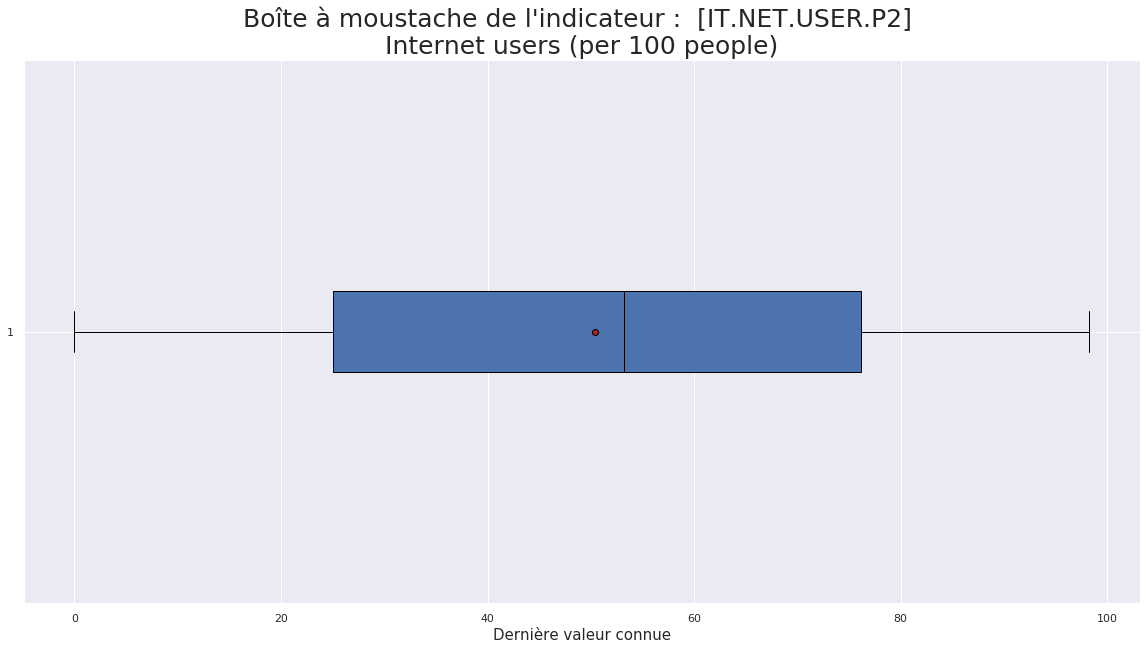

In [0]:
# Selection of countries and indicator
perimeter = liste_pays
indicator_code = "IT.NET.USER.P2"
data_selection = select_data(indicator_code, perimeter)

# On trace le diagramme en boîte
graph_boxplot(data_selection)

Nous voyons que le 3ème quartile Q3 vaut environ 75%. Pour une entreprise du secteur EdTech, le taux d'utilisateur d'Internet est réellement un indicateur crucial. Les pays ne faisant pas partie du dernier quartile n'ont sans doute ni les infrastructures ni la culture pour acceuillir des solutions de e-learning.

## Indicateur « Taux d'équipement d'ordinateurs personnel » (IT.CMP.PCMP.P2)
Pour une entreprise du secteur EdTech, outre le taux de connexion à Internet, le taux d'équipement en ordinateurs personnels est aussi un enjeu crucial. En effet, l'accès à Internet peut se faire via téléphone. Par contre, l'apprentissage en ligne nécessite plus spécifiquement un ordinateur.

In [0]:
# On va sélectionner les 25 pays ayant le meilleur taux d'équipement en ordinateurs
perimeter = liste_pays
indicator_code = "IT.CMP.PCMP.P2"
top_countries = top_countries_by_indic(indicator_code, perimeter, topn=25)

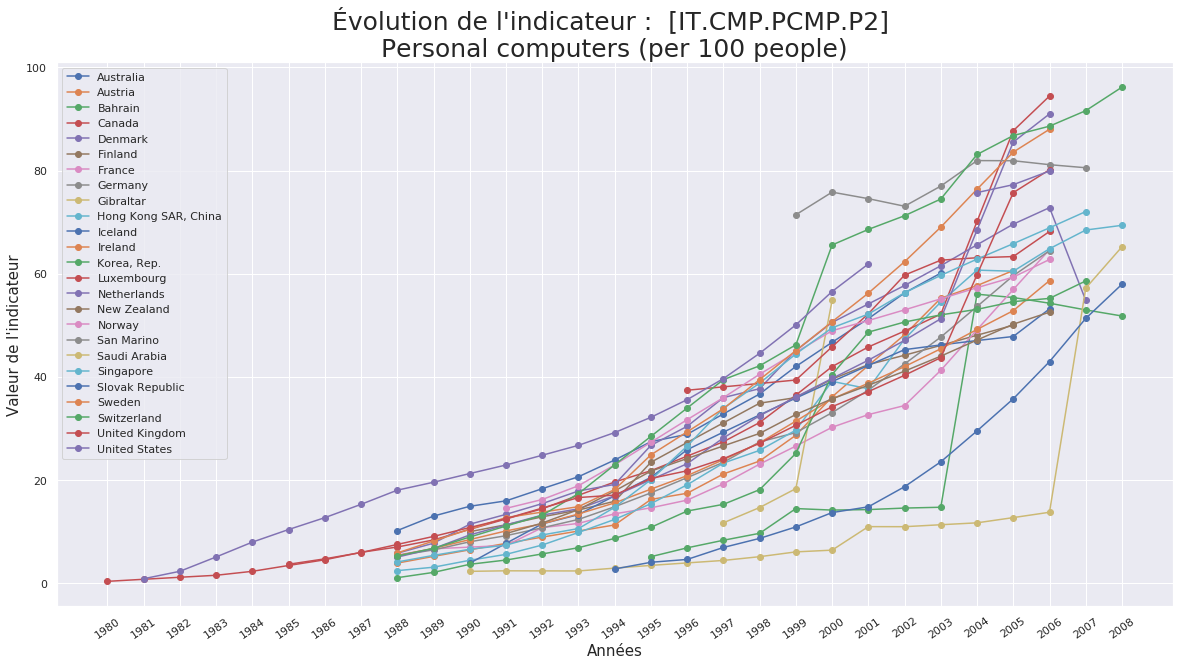

In [0]:
# On crée la vue sur les données pour l'indicateur et les pays
indicator_code = "IT.CMP.PCMP.P2"
perimeter = top_countries
data_selection = select_data(indicator_code, perimeter)

# On va tracer 
graph_evolution(data_selection)

Nous constatons ici de nettes différences entre les pays, avec des taux variant entre 50 et 100 ordinateurs pour 100 habitants pour le top-25 des pays les mieux équipés. D'autre part, la pertinence de ces données est à relativiser : les dernière données datent de 2008… Sans doute est-il un peu risqué de trop miser sur cet indicateur.

## Indicateur « Taux d'alphabétisation des jeunes (15-24 ans) » (SE.ADT.1524.LT.ZS)

In [0]:
# On récupère la liste des indicateurs sur l'alphabétisation
indicators_list = indicators_with_kw("literacy")

Indicator Code
SE.ADT.LITR.ZS                       Adult literacy rate, population 15+ years, both sexes (%)
SE.ADT.LITR.FE.ZS                        Adult literacy rate, population 15+ years, female (%)
UIS.LR.AG15T99.GPI        Adult literacy rate, population 15+ years, gender parity index (GPI)
SE.ADT.LITR.MA.ZS                          Adult literacy rate, population 15+ years, male (%)
UIS.LR.AG65                        Elderly literacy rate, population 65+ years, both sexes (%)
UIS.LR.AG65.F                          Elderly literacy rate, population 65+ years, female (%)
UIS.LR.AG65.GPI         Elderly literacy rate, population 65+ years, gender parity index (GPI)
UIS.LR.AG65.M                            Elderly literacy rate, population 65+ years, male (%)
UIS.LR.AG25T64                           Literacy rate, population 25-64 years, both sexes (%)
UIS.LR.AG25T64.F                             Literacy rate, population 25-64 years, female (%)
UIS.LR.AG25T64.GPI            Liter

Nous obtenons beaucoup d'indicateurs.  Nous allons essayer de sélectionner le plus pertinent en affichant d'avantage de détail.

In [0]:
# On définie un masque
mask = indics_merged.index.isin(indicators_list)

# On applique le masque et on affiche le dataframe, classé par remplissage
indics_merged[mask].sort_values("Count data (total)", ascending=False)[:10]

,Indicator Name,Children Indicators,Parents Indicators,Count data (total),Count years,Count countries
Indicator Code,,,,,,
SE.ADT.LITR.ZS,"Adult literacy rate, population 15+ years, both sexes (%)","[SE.ADT.LITR.FE.ZS, SE.ADT.LITR.MA.ZS]",None,0.106223,43,186
SE.ADT.LITR.FE.ZS,"Adult literacy rate, population 15+ years, female (%)",None,[SE.ADT.LITR.ZS],0.106061,43,186
UIS.LR.AG15T99.GPI,"Adult literacy rate, population 15+ years, gender parity index (GPI)",None,None,0.106061,43,186
SE.ADT.LITR.MA.ZS,"Adult literacy rate, population 15+ years, male (%)",None,[SE.ADT.LITR.ZS],0.106061,43,186
SE.ADT.1524.LT.ZS,"Youth literacy rate, population 15-24 years, both sexes (%)","[SE.ADT.1524.LT.FE.ZS, SE.ADT.1524.LT.FM.ZS, SE.ADT.1524.LT.MA.ZS]",None,0.105169,43,184
SE.ADT.1524.LT.FM.ZS,"Youth literacy rate, population 15-24 years, gender parity index (GPI)",None,[SE.ADT.1524.LT.ZS],0.105088,43,184
SE.ADT.1524.LT.FE.ZS,"Youth literacy rate, population 15-24 years, female (%)",None,[SE.ADT.1524.LT.ZS],0.105088,43,184
SE.ADT.1524.LT.MA.ZS,"Youth literacy rate, population 15-24 years, male (%)",None,[SE.ADT.1524.LT.ZS],0.105088,43,184
UIS.LR.AG65,"Elderly literacy rate, population 65+ years, both sexes (%)","[UIS.LR.AG65.F, UIS.LR.AG65.GPI, UIS.LR.AG65.M]",None,0.058661,43,169


Les indicateurs sur l'alphabétisation ont un taux de remplissage assez faible (au maximum de 10%). Nous sélectionnons l'indicateur SE.ADT.1524.LT.ZS qui porte sur les jeunes 15-24 ans et possède un taux de remplissage parmi les plus élevés parmi ceux portant sur l'alphabétisation.

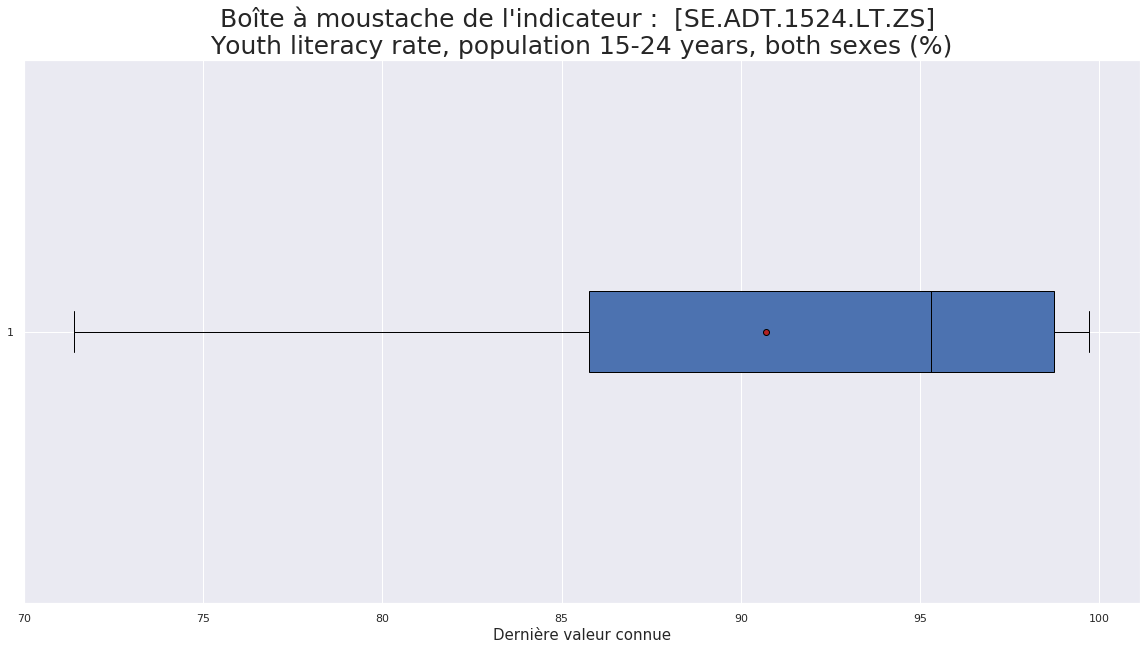

In [0]:
# Selection of countries and indicator
perimeter = liste_regions_geo
indicator_code = "SE.ADT.1524.LT.ZS"
data_selection = select_data(indicator_code, perimeter)

# Diagramme en boîte
graph_boxplot(data_selection)

# Analyse des projections (période 2020-2100)

In [0]:
# On récupère les données pour la période 2020-2100
data_futur = pd.concat([data_raw.loc[:,"Country Name":"Indicator Code"],data_raw.loc[:,"2020":"2100"]], axis=1)

# On groupe les données par indicateur
gb_futur = data_futur.groupby("Indicator Code")

# On compte les données par indicateur et par année
gb_futur_count = gb_futur.count()

# On calcul le total de données de projections
gb_futur_count['Total'] = gb_futur_count.loc[:,"2020":"2100"].sum(axis=1)
gb_futur_count = gb_futur_count.sort_values("Total",ascending=False)

# Nous éliminons les lignes ne comportant aucune projection
mask = gb_futur_count["Total"] != 0 # pd.Series of boolean
gb_futur_count = gb_futur_count[mask]

# Affichage d'un indicateur sur 10
gb_futur_count[::50]

,Country Name,Country Code,Indicator Name,2020,2025,2030,2035,2040,2045,2050,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Total
Indicator Code,,,,,,,,,,,,,,,,,,,,,
PRJ.ATT.60UP.1.MF,242,242,242,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,2839
PRJ.ATT.4064.2.MF,242,242,242,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,2839
PRJ.POP.ALL.S1.FE,242,242,242,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,2839
PRJ.ATT.2024.2.FE,242,242,242,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,2839
PRJ.POP.2529.4.FE,242,242,242,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,2839
PRJ.ATT.60UP.NED.MF,242,242,242,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,2839
PRJ.ATT.ALL.4.FE,242,242,242,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,2839


Nous constatons qu'il y a environ 310 indicateurs portant des projections pour l'avenir. Tous sont remplis pour l'intégralité de la période 2020-2100, et portent sur 167 pays. Nous allons maintenant aller plus en détail, en regardant à quoi correspondent ces indicateurs et en particulier regarder les indicateurs principaux.

In [0]:
# Nous récupérons la liste des indicateurs de projection
list_prj = list(gb_futur_count.index)

# Nous créons un masque avec ces indicateurs pour le dataframe indics_merged
mask = indics_merged.index.isin(list_prj)

# Nous appliquons le masque
indics_prj = indics_merged[mask]

# Nous conservons uniquement ceux qui n'ont pas d'indicateurs parents
mask = indics_prj["Parents Indicators"].isnull()
indics_prj_main = indics_prj[mask]

In [0]:
indics_prj_main[:5]

,Indicator Name,Children Indicators,Parents Indicators,Count data (total),Count years,Count countries
Indicator Code,,,,,,
PRJ.MYS.0T19.MF,Wittgenstein Projection: Mean years of schooling. Age 0-19. Total,"[PRJ.MYS.0T19.FE, PRJ.MYS.0T19.MA]",None,0.067655,5,167
PRJ.MYS.15UP.MF,Wittgenstein Projection: Mean years of schooling. Age 15+. Total,"[PRJ.MYS.15UP.FE, PRJ.MYS.15UP.GPI, PRJ.MYS.15UP.MA]",None,0.067655,5,167
PRJ.MYS.1519.MF,Wittgenstein Projection: Mean years of schooling. Age 15-19. Total,"[PRJ.MYS.1519.FE, PRJ.MYS.1519.MA]",None,0.067655,5,167
PRJ.MYS.2024.MF,Wittgenstein Projection: Mean years of schooling. Age 20-24. Total,"[PRJ.MYS.2024.FE, PRJ.MYS.2024.MA]",None,0.067655,5,167
PRJ.MYS.2039.MF,Wittgenstein Projection: Mean years of schooling. Age 20-39. Total,"[PRJ.MYS.2039.FE, PRJ.MYS.2039.MA]",None,0.067655,5,167


Nous obtenons 24 indicateurs principaux pour les projections.

Nous constatons que tous ces indicateurs portent sur :
* durée moyenne de scolarisation
* niveau d'étude maximum atteint en pourcentage
* niveau d'étude maximum atteint en milliers

Nous pourrions notamment regarder plus en détail les indicateurs suivants : 

* PRJ.POP.ALL.3.MF : population en milliers dont le plus haut niveau d'étude est la fin de l'enseignement secondaire
* PRJ.POP.ALL.4.MF : population en milliers dont le plus haut niveau d'étude est la fin de l'enseignement supérieur

* PRJ.MYS.1519.MF : durée moyenne de la scolarisation pour les 15-19 ans
* PRJ.MYS.2024.MF : durée moyenne de la scolarisation pour les 20-24 ans

Nous allons chercher à récupérer les pays concernés par les projections.

In [0]:
# On filtre les données de la table indiquant les pays renseignés par indicateur
prj_indic = data_pt[data_pt.index=="PRJ.POP.ALL.3.MF"]

# On convertie les 0 en Nan
prj_indic = prj_indic.replace(0,np.nan)

# On supprime les colonnes avec des Nan
prj_indic = prj_indic.dropna(axis="columns")

# On récupère la liste des pays
prj_countries = list(prj_indic.iloc[:,2:-1])

# prj_countries

Nous constatons qu'à part le monde entier ("World"), il n'y a pas de projection par groupement de pays mais seulement par pays individuel.

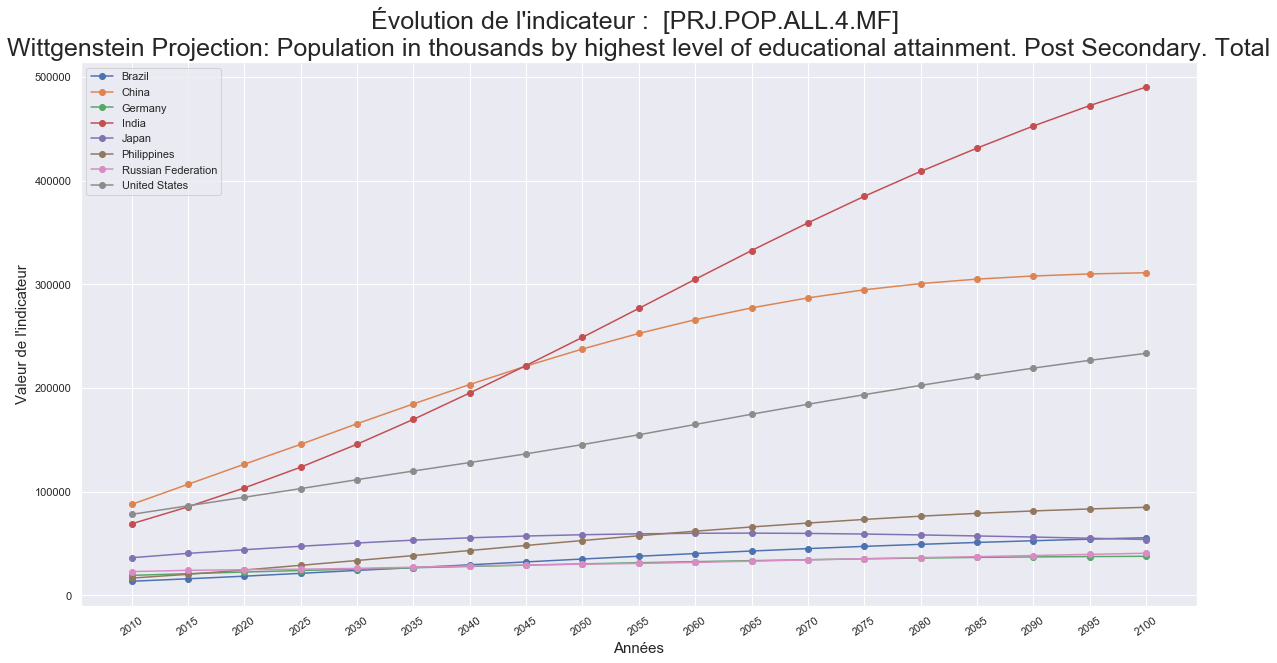

In [0]:
# On crée la vue sur les données pour l'indicateur et les pays
indicator_code = "PRJ.POP.ALL.4.MF"
perimeter = prj_countries

# On récupère les 8 pays ayant le plus grand nombre de diplômés du supérieur en 2100
perimeter.remove("World")
top_countries = top_countries_by_indic(indicator_code, perimeter, topn=8)
perimeter = top_countries

data_selection = select_data(indicator_code, perimeter)

# On va tracer le graphe
graph_evolution(data_selection)